### Step 0: Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set(font_scale=1.0)

RANDOM_STATE = 42


### Step 1: Loading the bankruptcy dataset



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

#df_raw = pd.read_csv("/content/drive/MyDrive//Bankruptcy_data.csv")
df_raw = pd.read_csv("Bankruptcy_data.csv")
df = df_raw.copy()

print("Raw shape:", df.shape)
df.head()

Raw shape: (6819, 97)


,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0.0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,...,0.780554,0.004919,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464
1,1,0.0,0.530005,0.572885,0.574763,0.605695,0.605558,0.999058,0.797512,0.809399,...,0.819963,0.005968,0.624171,0.605690,0.841869,0.279040,0.026801,0.565205,1,0.032442
2,2,0.0,0.571150,0.620148,0.624177,0.612275,0.612282,0.999163,0.797654,0.809533,...,0.839128,0.006022,0.625306,0.612271,0.843294,0.278927,0.026816,0.565276,1,0.033034
3,3,0.0,0.483401,0.556694,0.536164,0.602445,0.602445,0.999035,0.797458,0.809380,...,0.806477,0.002177,0.621610,0.602444,0.841891,0.293391,0.027063,0.566190,1,0.015406
4,4,0.0,0.510359,0.537287,0.552546,0.600023,0.600023,0.999009,0.797406,0.809313,...,0.799277,0.001124,0.623993,0.600019,0.840313,0.279878,0.026880,0.565549,1,0.028858


### Step 2: Initial Sanity Check
**(Raw data overview)**


In [3]:
print("~~~~ DataFrame info (raw) ~~~~")
df.info()

print("\n~~~~ Basic describe (raw) ~~~~")
display(df.describe().T.head(10))

print("\n~~~~ Missing values per column (raw) ~~~~")
missing_counts_raw = df.isna().sum().sort_values(ascending=False)
display(missing_counts_raw.head(15))

print("\n~~~~ Target distribution (raw) ~~~~")
print(df["Bankrupt?"].value_counts(dropna=False))
df = df.dropna(subset=["Bankrupt?"])
df.info()

~~~~ DataFrame info (raw) ~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Index                                                     6819 non-null   int64  
 1   Bankrupt?                                                 5807 non-null   float64
 2    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 3    ROA(A) before interest and % after tax                   6819 non-null   float64
 4    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 5    Operating Gross Margin                                   6819 non-null   float64
 6    Realized Sales Gross Margin                              6819 non-null   float64
 7    Operating Profit Rate                                    6819 non-null   

,count,mean,std,min,25%,50%,75%,max
Index,6819.0,2547.189764,1769.926321,0.0,852.000000,2397.000000,4101.500000,5806.0
Bankrupt?,5807.0,0.034097,0.181493,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
Realized Sales Gross Margin,6819.0,0.607929,0.016916,0.0,0.600434,0.605976,0.613842,1.0
Operating Profit Rate,6819.0,0.998755,0.013010,0.0,0.998969,0.999022,0.999095,1.0
Pre-tax net Interest Rate,6819.0,0.797190,0.012869,0.0,0.797386,0.797464,0.797579,1.0
After-tax net Interest Rate,6819.0,0.809084,0.013601,0.0,0.809312,0.809375,0.809469,1.0



~~~~ Missing values per column (raw) ~~~~


Bankrupt?                                                   1012
Index                                                          0
 ROA(C) before interest and depreciation before interest       0
 ROA(A) before interest and % after tax                        0
 ROA(B) before interest and depreciation after tax             0
 Operating Gross Margin                                        0
 Realized Sales Gross Margin                                   0
 Operating Profit Rate                                         0
 Pre-tax net Interest Rate                                     0
 After-tax net Interest Rate                                   0
 Non-industry income and expenditure/revenue                   0
 Continuous interest rate (after tax)                          0
 Operating Expense Rate                                        0
 Research and development expense rate                         0
 Cash flow rate                                                0
dtype: int64


~~~~ Target distribution (raw) ~~~~
Bankrupt?
0.0    5609
NaN    1012
1.0     198
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 5807 entries, 0 to 5806
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Index                                                     5807 non-null   int64  
 1   Bankrupt?                                                 5807 non-null   float64
 2    ROA(C) before interest and depreciation before interest  5807 non-null   float64
 3    ROA(A) before interest and % after tax                   5807 non-null   float64
 4    ROA(B) before interest and depreciation after tax        5807 non-null   float64
 5    Operating Gross Margin                                   5807 non-null   float64
 6    Realized Sales Gross Margin                              5807 non-null   float64
 7    

### Step 3: Exploratory Data Analysis


**Step 3.1: Target Imbalance (Raw)**

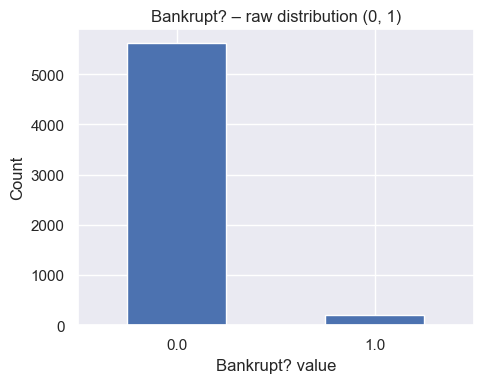

Relative frequencies (raw):
Bankrupt?
0.0    0.965903
1.0    0.034097
Name: count, dtype: float64


In [4]:
plt.figure(figsize=(5, 4))

value_counts_raw = df["Bankrupt?"].value_counts(dropna=False)
value_counts_raw.plot(kind="bar")

plt.title("Bankrupt? – raw distribution (0, 1)")
plt.xlabel("Bankrupt? value")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Relative frequencies (raw):")
print(value_counts_raw / len(df))


**Step 3.2: Cleaning and Handling Missing Values**


In [5]:
# Keep a copy to compare shapes later if needed
df_before_clean = df.copy()

# Remove Index column if present
if "Index" in df.columns:
    df = df.drop(columns=["Index"])
    print("Dropped 'Index' column.")
else:
    print("'Index' column not found (already removed).")

# Convert everything to numeric – problematic values become NaN
df = df.apply(pd.to_numeric, errors="coerce")

# Check total NaNs before filling
total_nans_before = df.isna().sum().sum()
print(f"Total NaN values before median fill: {total_nans_before}")

# Fill NaNs with column-wise median (numeric only)
medians = df.median(numeric_only=True)
df = df.fillna(medians)

# Remove duplicates
rows_before_dup = len(df)
df = df.drop_duplicates()
rows_after_dup = len(df)

print(f"Removed {rows_before_dup - rows_after_dup} duplicate rows (if any).")

# Confirm NaNs now
print("Total NaN values after median fill:", df.isna().sum().sum())

print("\nCleaned shape:", df.shape)

# Target distribution after cleaning/imputation
print("\n=== Target distribution (clean, after median fill) ===")
print(df["Bankrupt?"].value_counts())
print(df["Bankrupt?"].value_counts(normalize=True))


Dropped 'Index' column.
Total NaN values before median fill: 0
Removed 0 duplicate rows (if any).
Total NaN values after median fill: 0

Cleaned shape: (5807, 96)

=== Target distribution (clean, after median fill) ===
Bankrupt?
0.0    5609
1.0     198
Name: count, dtype: int64
Bankrupt?
0.0    0.965903
1.0    0.034097
Name: proportion, dtype: float64


**Step 3.3: Before vs After cleaning summary**


In [6]:
summary_before_after = pd.DataFrame({
    "stage": ["before_cleaning", "after_cleaning"],
    "n_rows": [len(df_raw), len(df)],
    "n_cols": [df_raw.shape[1], df.shape[1]],
})

summary_before_after


,stage,n_rows,n_cols
0,before_cleaning,6819,97
1,after_cleaning,5807,96


**Step 3.4: Target Imbalance After Cleaning**


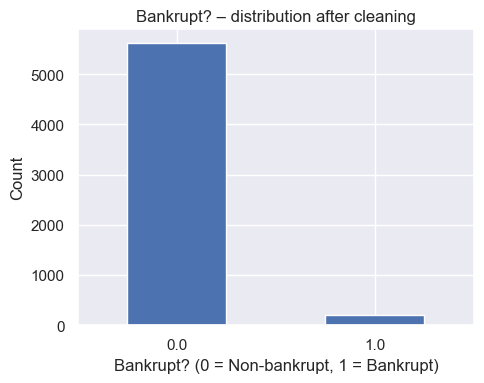

In [7]:
plt.figure(figsize=(5, 4))
df["Bankrupt?"].value_counts().plot(kind="bar")

plt.title("Bankrupt? – distribution after cleaning")
plt.xlabel("Bankrupt? (0 = Non-bankrupt, 1 = Bankrupt)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Step 3.5: Correlation Between Each Feature and `Bankrupt?`**


Top correlated features with Bankrupt?:


Net Income to Total Assets                                -0.319499
ROA(A) before interest and % after tax                    -0.279412
ROA(B) before interest and depreciation after tax         -0.269430
ROA(C) before interest and depreciation before interest   -0.258319
Debt ratio %                                               0.255948
Net worth/Assets                                          -0.255948
Retained Earnings to Total Assets                         -0.245174
Persistent EPS in the Last Four Seasons                   -0.213784
Net profit before tax/Paid-in capital                     -0.202788
Per Share Net profit before tax (Yuan ¥)                  -0.196457
Working Capital to Total Assets                           -0.195747
Current Liability to Assets                                0.195163
Borrowing dependency                                       0.194085
Net Income to Stockholder's Equity                        -0.178342
Liability to Equity                             

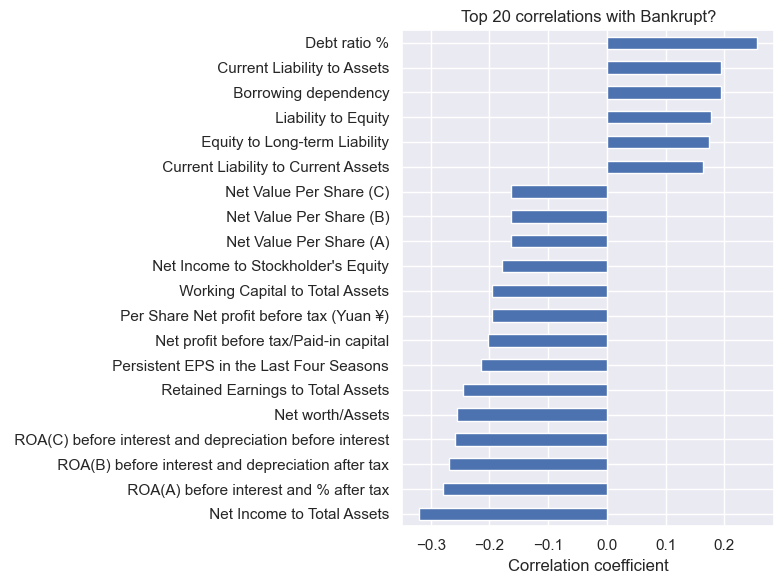

In [8]:
# Ensure target is int
df["Bankrupt?"] = df["Bankrupt?"].astype(int)

corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix["Bankrupt?"].drop("Bankrupt?")
target_corr_sorted = target_corr.reindex(
    target_corr.abs().sort_values(ascending=False).index
)

top_k = 20
top_corr = target_corr_sorted.head(top_k)

print("Top correlated features with Bankrupt?:")
display(top_corr)

plt.figure(figsize=(8, 6))
top_corr.sort_values().plot(kind="barh")
plt.title("Top 20 correlations with Bankrupt?")
plt.xlabel("Correlation coefficient")
plt.tight_layout()
plt.show()


**Step 3.6: Correlation Heatmap (Top 20 Most Influential Features)**

C:\Users\ayush\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\ayush\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


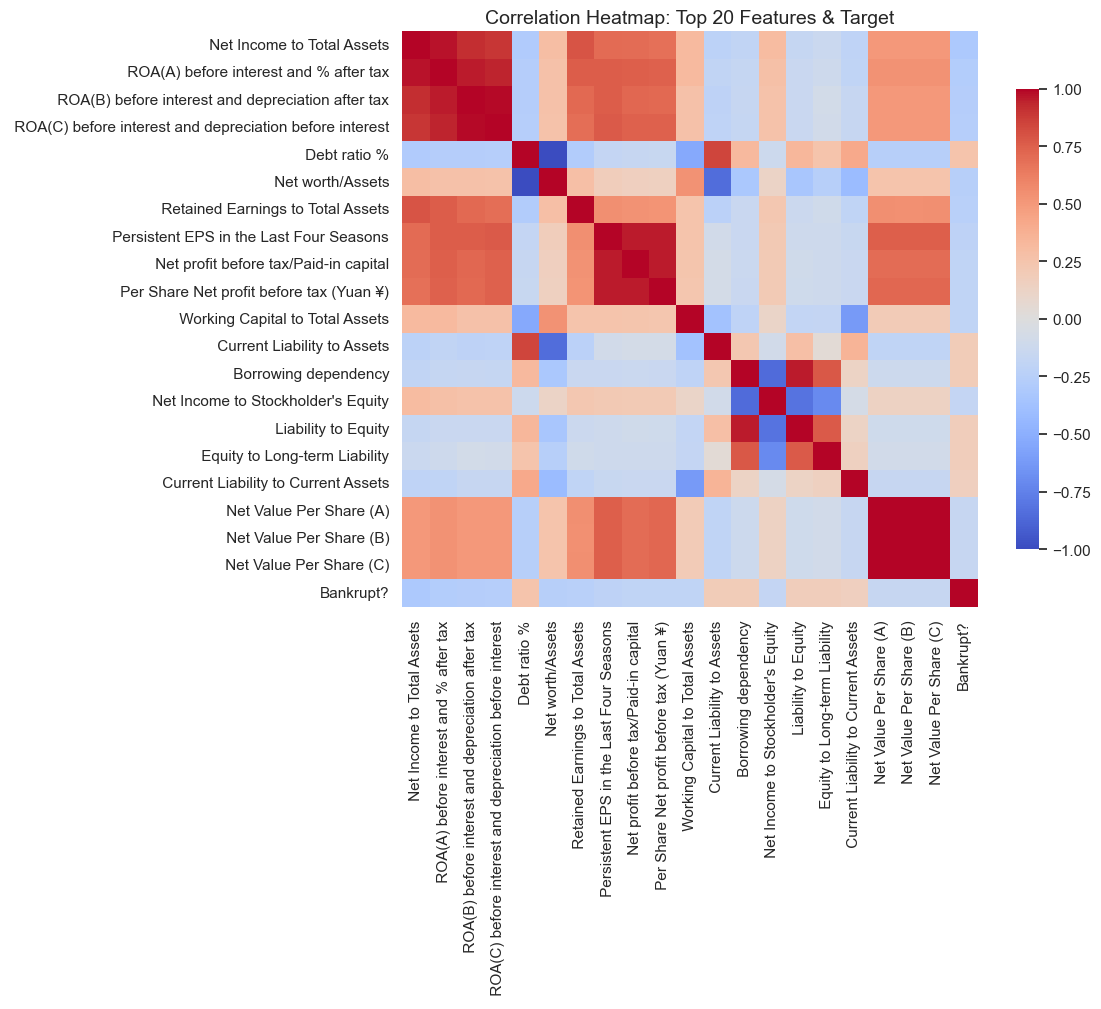

In [9]:
# Correlation Heatmap (Top 20 influential features)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation of all features with the target
target_col = "Bankrupt?"

corr_with_target = df.drop(columns=[target_col]).corrwith(df[target_col])

# Select top 20 strongest features (absolute correlation)
top_abs = corr_with_target.abs().sort_values(ascending=False).head(20).index.tolist()

# Build correlation matrix only for these features + target
heatmap_cols = top_abs + [target_col]
corr_matrix = df[heatmap_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap: Top 20 Features & Target", fontsize=14)
plt.tight_layout()
plt.show()

**Step 3.7: Example distributions of important features**


In [10]:
# Pick 7-8 top features automatically (excluding the target itself)
top_feature_names = top_corr.index[:8].tolist()
top_feature_names


[' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(C) before interest and depreciation before interest',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Retained Earnings to Total Assets',
 ' Persistent EPS in the Last Four Seasons']

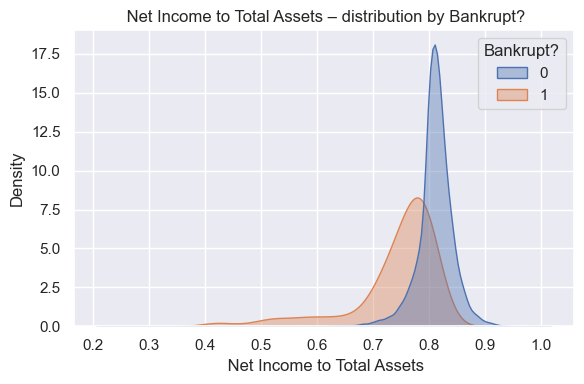

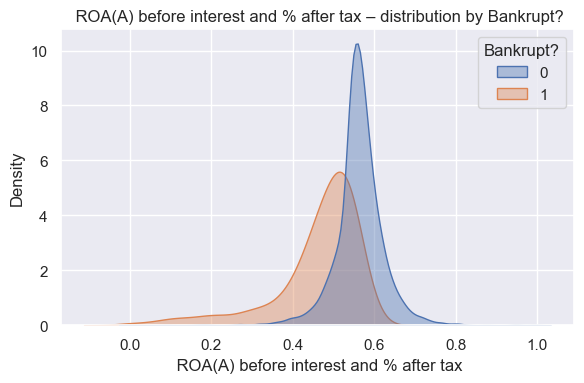

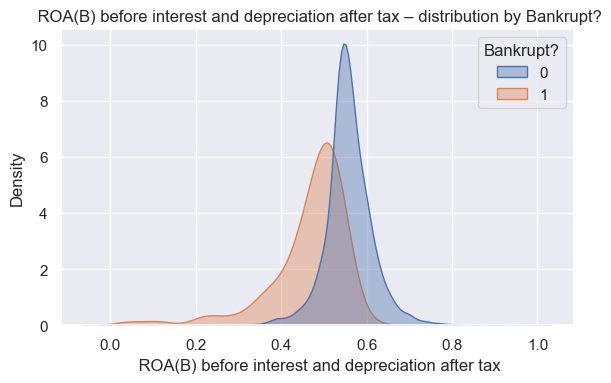

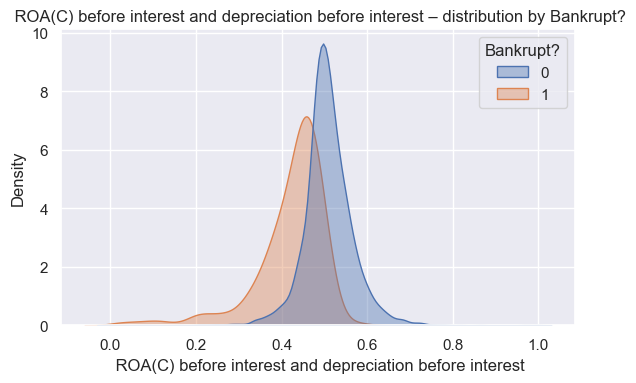

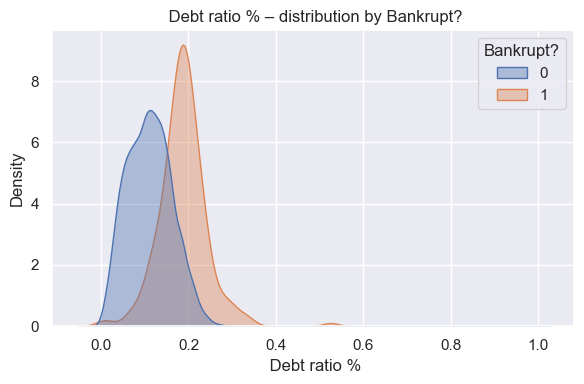

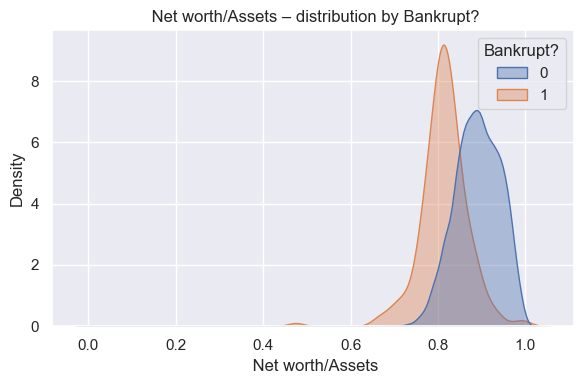

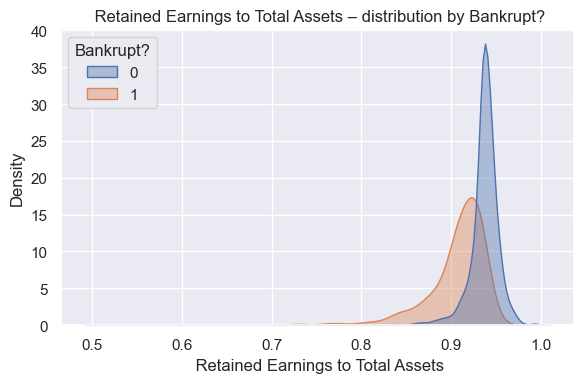

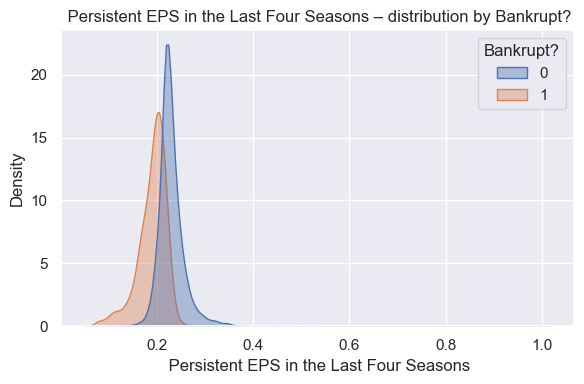

In [11]:
# KDE plots per class for top features
for col in top_feature_names:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(
        data=df,
        x=col,
        hue="Bankrupt?",
        common_norm=False,
        fill=True,
        alpha=0.4
    )
    plt.title(f"{col} – distribution by Bankrupt?")
    plt.tight_layout()
    plt.show()


**Step 3.8: PCA visualisation of all features**


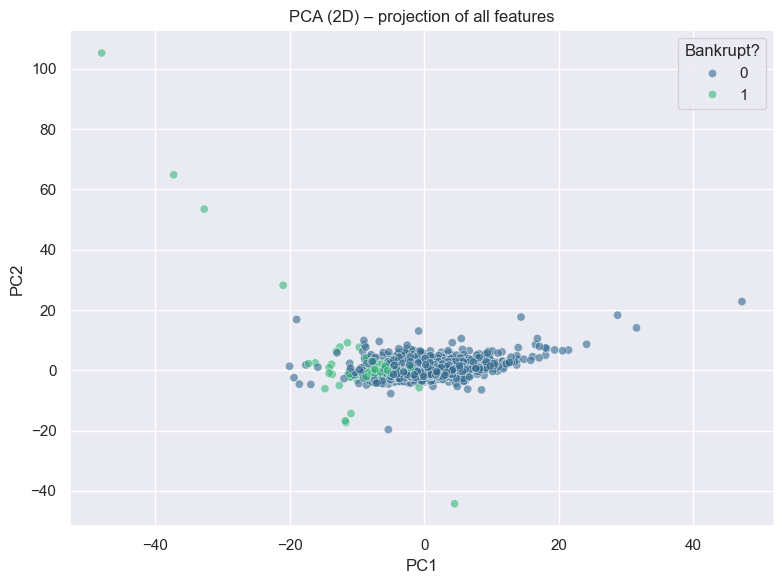

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_all = df.drop(columns=["Bankrupt?"])
y_all = df["Bankrupt?"].astype(int)

scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(X_all)

pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y_all,
    palette="viridis",
    alpha=0.6
)
plt.title("PCA (2D) – projection of all features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Bankrupt?")
plt.tight_layout()
plt.show()


### Step 4: Train-test split

**Step 4.1: separate features and target, then split**

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Bankrupt?"])
y = df["Bankrupt?"].astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state = 42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Positive rate in train:", y_train.mean())
print("Positive rate in test:", y_test.mean())


Train shape: (4645, 95)
Test shape: (1162, 95)
Positive rate in train: 0.034015069967707215
Positive rate in test: 0.03442340791738382


**Step 4.2: Applying SMOTE to Balance Classes**


In [14]:
# Apply SMOTE > balance classes
print("Original training distribution:")
print(y_train.value_counts())

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print(y_train_resampled.value_counts())


Original training distribution:
Bankrupt?
0    4487
1     158
Name: count, dtype: int64
After SMOTE:
Bankrupt?
1    4487
0    4487
Name: count, dtype: int64


### Step 5: Models

### Model 1: KNN

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn import set_config

# Show sklearn pipeline as a DIAGRAM
set_config(display="diagram")




In [16]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import metrics
import pandas as pd

k_values = [5, 10, 15]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_results = {}

for k in k_values:
    print(f"\n=== KNN with k = {k} ===")

    #Build pipeline for this k
    knn_pipeline_k = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(
            n_neighbors=k,
            weights="distance"
        ))
    ])

    #Cross-validation on full X, y (imbalanced, just for comparison)
    cv_scores = cross_val_score(
        knn_pipeline_k,
        X,
        y,
        cv=cv,
        scoring="roc_auc",   # better than accuracy for imbalanced data
        n_jobs=-1
    )
    print("CV ROC-AUC scores:", cv_scores)
    print("Mean CV ROC-AUC :", cv_scores.mean())

    #Fit on SMOTE-resampled training data
    knn_pipeline_k.fit(X_train_resampled, y_train_resampled)

    #Evaluate on test set
    y_pred = knn_pipeline_k.predict(X_test)
    y_prob = knn_pipeline_k.predict_proba(X_test)[:, 1]

    accuracy  = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, zero_division=0)
    recall    = metrics.recall_score(y_test, y_pred, zero_division=0)
    f1        = metrics.f1_score(y_test, y_pred, zero_division=0)
    try:
        roc_auc = metrics.roc_auc_score(y_test, y_prob)
    except ValueError:
        roc_auc = float("nan")

    cm = metrics.confusion_matrix(y_test, y_pred)

    print("Test metrics:")
    print(f"  Accuracy : {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")
    print(f"  F1-score : {f1:.4f}")
    print(f"  ROC-AUC  : {roc_auc:.4f}")
    print("  Confusion matrix:\n", cm)


    knn_results[k] = {
        "model": knn_pipeline_k,
        "cv_scores": cv_scores,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "cm": cm,
        "y_prob": y_prob
    }

# Choose best k based on ROC-AUC on the test set
best_k = max(knn_results, key=lambda kk: knn_results[kk]["roc_auc"])
best_knn = knn_results[best_k]["model"]

print("\n==============================")
print(f"Best k according to ROC-AUC on test set: k = {best_k}")
print("ROC-AUC for each k:")
summary_df = pd.DataFrame({
    "k": k_values,
    "Accuracy":  [knn_results[k]["accuracy"]  for k in k_values],
    "Precision": [knn_results[k]["precision"] for k in k_values],
    "Recall":    [knn_results[k]["recall"]    for k in k_values],
    "F1":        [knn_results[k]["f1"]        for k in k_values],
    "ROC-AUC":   [knn_results[k]["roc_auc"]   for k in k_values],
}).set_index("k")
display(summary_df)



=== KNN with k = 5 ===
CV ROC-AUC scores: [0.76934046 0.73266488 0.74897162 0.739819   0.77368421]
Mean CV ROC-AUC : 0.7528960358526923
Test metrics:
  Accuracy : 0.8933
  Precision: 0.1912
  Recall   : 0.6500
  F1-score : 0.2955
  ROC-AUC  : 0.8447
  Confusion matrix:
 [[1012  110]
 [  14   26]]

=== KNN with k = 10 ===
CV ROC-AUC scores: [0.84055258 0.7972148  0.83464738 0.80394442 0.81701606]
Mean CV ROC-AUC : 0.8186750474255066
Test metrics:
  Accuracy : 0.8752
  Precision: 0.1856
  Recall   : 0.7750
  F1-score : 0.2995
  ROC-AUC  : 0.8841
  Confusion matrix:
 [[986 136]
 [  9  31]]

=== KNN with k = 15 ===
CV ROC-AUC scores: [0.87823084 0.84068627 0.85306687 0.82272956 0.81002453]
Mean CV ROC-AUC : 0.8409476139528088
Test metrics:
  Accuracy : 0.8434
  Precision: 0.1587
  Recall   : 0.8250
  F1-score : 0.2661
  ROC-AUC  : 0.9059
  Confusion matrix:
 [[947 175]
 [  7  33]]

Best k according to ROC-AUC on test set: k = 15
ROC-AUC for each k:


,Accuracy,Precision,Recall,F1,ROC-AUC
k,,,,,
5,0.893287,0.191176,0.650,0.295455,0.844742
10,0.875215,0.185629,0.775,0.299517,0.884102
15,0.843373,0.158654,0.825,0.266129,0.905882


Plots below are for KNN with k = 15


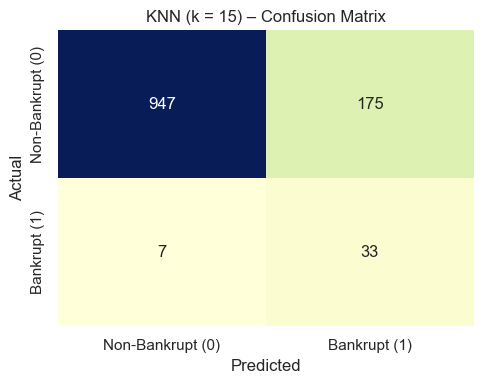

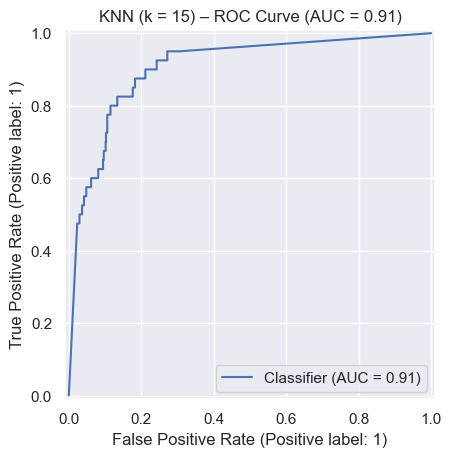

In [17]:
from sklearn.metrics import RocCurveDisplay

# Pull stored objects for the best k
cm_knn   = knn_results[best_k]["cm"]
y_prob_best = knn_results[best_k]["y_prob"]

print(f"Plots below are for KNN with k = {best_k}")

# Confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_knn,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    cbar=False,
    xticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"],
    yticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"]
)
plt.title(f"KNN (k = {best_k}) – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC curve
if not np.isnan(knn_results[best_k]["roc_auc"]):
    RocCurveDisplay.from_predictions(y_test, y_prob_best)
    plt.title(f"KNN (k = {best_k}) – ROC Curve (AUC = {knn_results[best_k]['roc_auc']:.2f})")
    plt.show()


### Model 2: ANN

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

ann_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("ann", MLPClassifier(
        hidden_layer_sizes=(128, 64, 32, 16),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        batch_size=128,
        learning_rate="adaptive",
        max_iter=400,
        random_state=RANDOM_STATE,
        early_stopping=True,
        n_iter_no_change=10,
        verbose=False
    ))
])

print("Training ANN on SMOTE-resampled training data...")
ann_pipeline.fit(X_train_resampled, y_train_resampled)
print("Training complete.")


Training ANN on SMOTE-resampled training data...
Training complete.


In [19]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

y_pred_ann = ann_pipeline.predict(X_test)
y_prob_ann = ann_pipeline.predict_proba(X_test)[:, 1]

accuracy_ann  = metrics.accuracy_score(y_test, y_pred_ann)
precision_ann = metrics.precision_score(y_test, y_pred_ann, zero_division=0)
recall_ann    = metrics.recall_score(y_test, y_pred_ann, zero_division=0)
f1_ann        = metrics.f1_score(y_test, y_pred_ann, zero_division=0)

try:
    roc_auc_ann = metrics.roc_auc_score(y_test, y_prob_ann)
except ValueError:
    roc_auc_ann = float("nan")

cm_ann = metrics.confusion_matrix(y_test, y_pred_ann)

print("ANN – Test set metrics")
print("Accuracy : {} ({:.2%})".format(accuracy_ann, accuracy_ann))
print(f"Precision: {precision_ann:.4f}")
print(f"Recall   : {recall_ann:.4f}")
print(f"F1-score : {f1_ann:.4f}")
print(f"ROC AUC  : {roc_auc_ann:.4f}")
print("\nConfusion Matrix (rows=true, cols=pred):\n", cm_ann)

print("\nClassification Report (ANN):")
print(metrics.classification_report(
    y_test,
    y_pred_ann,
    target_names=["Non-Bankrupt (0)", "Bankrupt (1)"]
))

ANN – Test set metrics
Accuracy : 0.9690189328743546 (96.90%)
Precision: 0.5556
Recall   : 0.5000
F1-score : 0.5263
ROC AUC  : 0.9083

Confusion Matrix (rows=true, cols=pred):
 [[1106   16]
 [  20   20]]

Classification Report (ANN):
                  precision    recall  f1-score   support

Non-Bankrupt (0)       0.98      0.99      0.98      1122
    Bankrupt (1)       0.56      0.50      0.53        40

        accuracy                           0.97      1162
       macro avg       0.77      0.74      0.76      1162
    weighted avg       0.97      0.97      0.97      1162



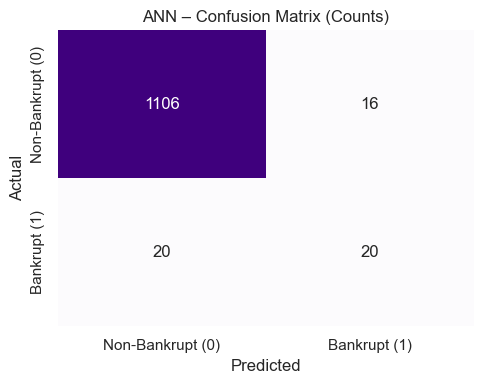

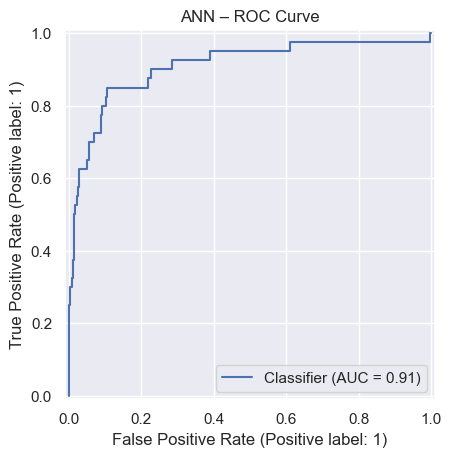

In [20]:
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_ann,
    annot=True,
    fmt="d",
    cmap="Purples",
    cbar=False,
    xticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"],
    yticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"]
)
plt.title("ANN – Confusion Matrix (Counts)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


if not np.isnan(roc_auc_ann):
    RocCurveDisplay.from_predictions(y_test, y_prob_ann)
    plt.title("ANN – ROC Curve")
    plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_37996\3204290441.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


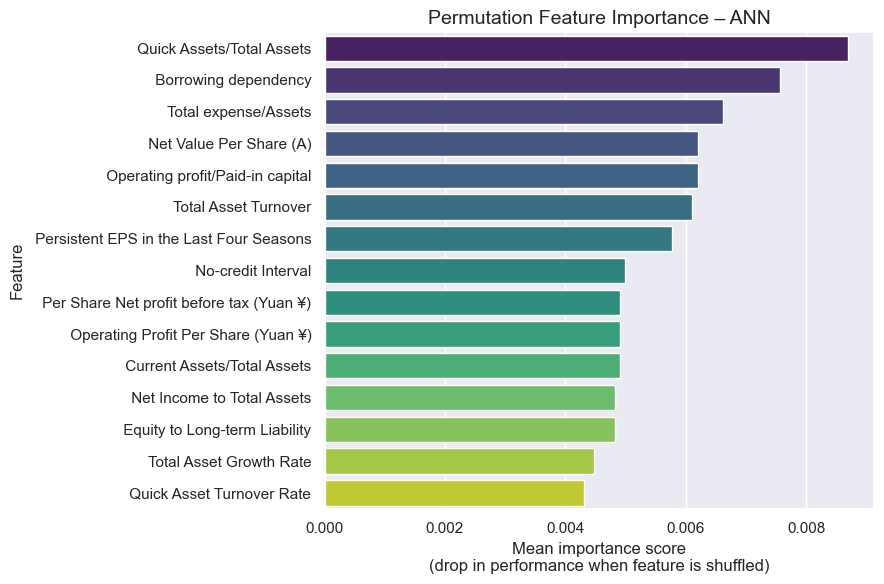

In [21]:
from sklearn.inspection import permutation_importance
feature_names = X.columns.tolist()


result = permutation_importance(
    ann_pipeline,
    X_test,
    y_test,
    n_repeats=10,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# 3) Select top N features
top_n = 15
top_idx = indices[:top_n]
top_features = [feature_names[i] for i in top_idx]
top_scores   = importances[top_idx]

# 4) Plot colorful bar chart
plt.figure(figsize=(9, 6))
sns.barplot(
    x=top_scores,
    y=top_features,
    orient="h",
    palette="viridis"
)
plt.title("Permutation Feature Importance – ANN", fontsize=14)
plt.xlabel("Mean importance score\n(drop in performance when feature is shuffled)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Model 3: SVC

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(
        kernel='rbf',
        probability=True,
        class_weight='balanced',
        random_state=42
    ))
])

svm_pipeline.fit(X_train_resampled, y_train_resampled)

y_pred_svm  = svm_pipeline.predict(X_test)
y_proba_svm = svm_pipeline.predict_proba(X_test)[:, 1]


~~~~ SVM RESULTS ~~~~
Confusion matrix:
 [[1039   83]
 [  12   28]]


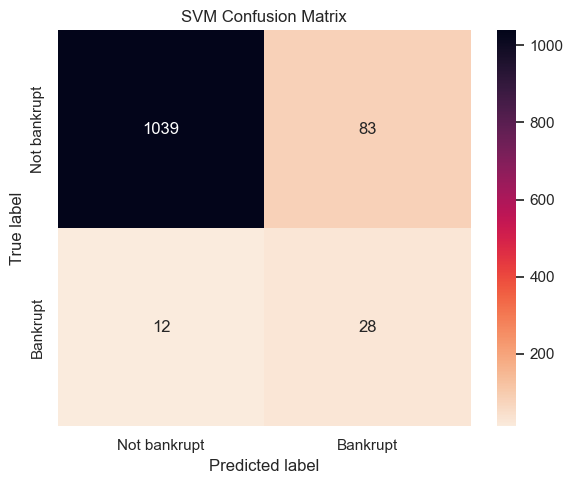


~~~~ Classification report: ~~~~
              precision    recall  f1-score   support

Not bankrupt       0.99      0.93      0.96      1122
    Bankrupt       0.25      0.70      0.37        40

    accuracy                           0.92      1162
   macro avg       0.62      0.81      0.66      1162
weighted avg       0.96      0.92      0.94      1162

ROC-AUC (SVM): 0.9226381461675579


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score
)


def plot_confusion(cm, labels, title):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="rocket_r",
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()


cm_svm = confusion_matrix(y_test, y_pred_svm)
print("~~~~ SVM RESULTS ~~~~")
print("Confusion matrix:\n", cm_svm)
plot_confusion(cm_svm, ['Not bankrupt', 'Bankrupt'], "SVM Confusion Matrix")

print("\n~~~~ Classification report: ~~~~")
print(classification_report(y_test, y_pred_svm, target_names=['Not bankrupt', 'Bankrupt']))

auc_svm = roc_auc_score(y_test, y_proba_svm)
print("ROC-AUC (SVM):", auc_svm)


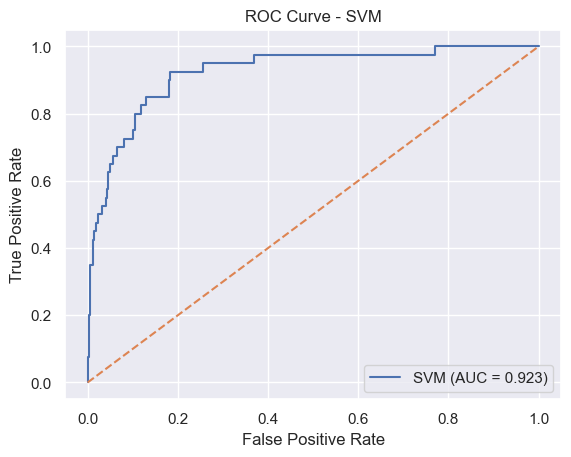

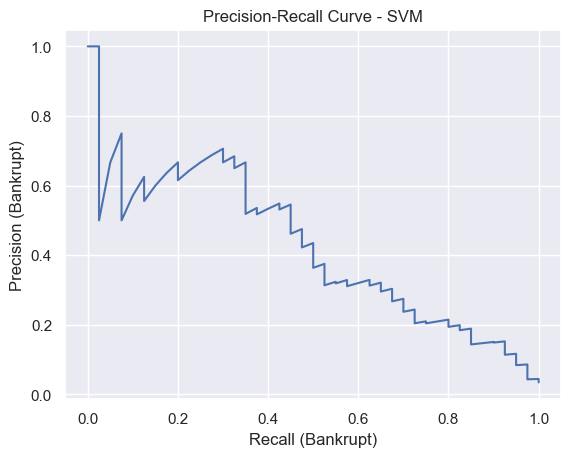

In [25]:
 # ROC-Area under the curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import (
    roc_curve,
    precision_recall_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
plt.figure()
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc_svm:.3f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

 # Precision-Recall curve (focusing on the  bankrupt class)
prec, rec, _ = precision_recall_curve(y_test, y_proba_svm)
plt.figure()
plt.plot(rec, prec)
plt.xlabel('Recall (Bankrupt)')
plt.ylabel('Precision (Bankrupt)')
plt.title('Precision-Recall Curve - SVM')
plt.show()


In [26]:
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd

# set this to your trained SVM model
svm_model = svm_pipeline  # e.g. svm_model = svm_pipeline or svm_clf

result = permutation_importance(
    svm_model,
    X_test,
    y_test,
    scoring="roc_auc",
    n_repeats=10,
    random_state=42
)

svm_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": result.importances_mean,
    "std_dev": result.importances_std
}).sort_values(by="importance", ascending=False)

svm_importance.head(15)


,feature,importance,std_dev
56,Cash/Total Assets,0.019953,0.014042
44,Total Asset Turnover,0.018075,0.007888
18,Persistent EPS in the Last Four Seasons,0.013465,0.004738
37,Net worth/Assets,0.009098,0.004160
36,Debt ratio %,0.009098,0.004160
48,Fixed Assets Turnover Frequency,0.003411,0.001095
85,Net Income to Total Assets,0.002680,0.001477
49,Net Worth Turnover Rate (times),0.002551,0.001326
2,ROA(B) before interest and depreciation after...,0.002248,0.001950
0,ROA(C) before interest and depreciation befor...,0.002199,0.001838


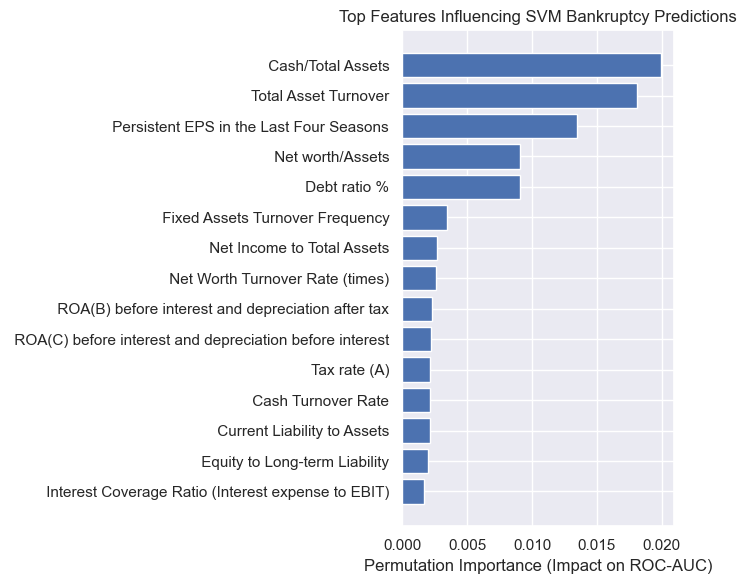

In [27]:
topN = 15  # change if you want more/less

plt.figure(figsize=(7,6))
plt.barh(
    svm_importance["feature"].head(topN),
    svm_importance["importance"].head(topN)
)
plt.gca().invert_yaxis()
plt.xlabel("Permutation Importance (Impact on ROC-AUC)")
plt.title("Top Features Influencing SVM Bankruptcy Predictions")
plt.tight_layout()
plt.show()


### Model 4: CatBoost

In [30]:
%pip install catboost


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   --- ------------------------------------ 9.4/102.4 MB 54.6 MB/s eta 0:00:02
   ------- -------------------------------- 18.6/102.4 MB 52.4 MB/s eta 0:00:02
   ----------- ---------------------------- 29.9/102.4 MB 50.5 MB/s eta 0:00:02
   --------------- ------------------------ 39.6/102.4 MB 51.4 MB/s eta 0:00:02
   --------------------- ------------------ 54.3/102.4 MB 53.0 MB/s eta 0:00:01
   -------------------------- ------------- 67.4/102.4 MB 54.6 MB/s eta 0:00:01
   ------------------------------ --------- 79.2/102.4 MB 54.5 MB/s eta 0:00:01
   ----------------------------------- ---- 89.9/102.4 MB 53.9 MB/s eta 0:00:01
   --------------------------------------  102.2/102.4 MB 54.3 MB/s eta 0:00:01
   --------------------------------------- 102.4/102.4 MB 49.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
# 4.1 Train the CatBoost model

from catboost import CatBoostClassifier

# Define the CatBoost classifier with reasonable starting hyperparameters.
# These can be tuned later if needed.
cat_model = CatBoostClassifier(
    iterations=500,            # similar to n_estimators
    depth=6,                   # tree depth -> model complexity
    learning_rate=0.05,        # step size
    loss_function="Logloss",   # binary classification
    eval_metric="AUC",         # optimize AUC for imbalanced tasks
    random_seed=RANDOM_STATE,
    verbose=False              # change to True or int for progress
    # If you have categorical features, add cat_features=...
)

# Fit on the SMOTE-balanced training data
cat_model.fit(X_train_resampled, y_train_resampled)

print("CatBoost model trained on SMOTE-balanced data.")


CatBoost model trained on SMOTE-balanced data.


In [32]:
# 4.2 Evaluate the CatBoost model on the test set

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_fscore_support,
    precision_score,
    recall_score,
    f1_score,
    average_precision_score       # PR-AUC (Average Precision)
)

# Make predictions with the DEFAULT threshold (0.50)
y_pred_cat = cat_model.predict(X_test)                 # class labels (0/1)
y_proba_cat = cat_model.predict_proba(X_test)[:, 1]    # prob of class 1

# Core metrics at default threshold = 0.50
accuracy_cat = (y_pred_cat == y_test).mean()
precision_cat, recall_cat, f1_cat, _ = precision_recall_fscore_support(
    y_test, y_pred_cat, average="binary", pos_label=1
)
roc_auc_cat = roc_auc_score(y_test, y_proba_cat)
pr_auc_cat  = average_precision_score(y_test, y_proba_cat)  # PR-AUC

print("=== CatBoost Performance on Test Set (threshold = 0.50) ===")
print(f"Accuracy : {accuracy_cat:.4f}")
print(f"Precision: {precision_cat:.4f}")
print(f"Recall   : {recall_cat:.4f}")
print(f"F1-score : {f1_cat:.4f}")
print(f"ROC-AUC  : {roc_auc_cat:.4f}")
print(f"PR-AUC   : {pr_auc_cat:.4f}\n")

print("Classification Report (threshold = 0.50):")
print(classification_report(y_test, y_pred_cat, digits=4))


# Threshold sweep to see precision–recall–F1 trade-offs
print("\n=== Threshold sweep for CatBoost (precision vs recall trade-off) ===")
thresholds = [0.50, 0.45, 0.40, 0.35, 0.30, 0.25]

print("Threshold  Precision  Recall  F1")
for thr in thresholds:
    y_pred_thr = (y_proba_cat >= thr).astype(int)
    prec = precision_score(y_test, y_pred_thr, pos_label=1)
    rec  = recall_score(y_test, y_pred_thr, pos_label=1)
    f1   = f1_score(y_test, y_pred_thr, pos_label=1)
    print(f"{thr:8.2f}  {prec:9.3f}  {rec:6.3f}  {f1:5.3f}")

# Choose a custom threshold for higher recall if needed
best_thr_cat = 0.35  # <- adjust after looking at the sweep above

y_pred_cat_custom = (y_proba_cat >= best_thr_cat).astype(int)

accuracy_cat_custom = (y_pred_cat_custom == y_test).mean()
precision_cat_custom = precision_score(y_test, y_pred_cat_custom, pos_label=1)
recall_cat_custom    = recall_score(y_test, y_pred_cat_custom, pos_label=1)
f1_cat_custom        = f1_score(y_test, y_pred_cat_custom, pos_label=1)
cm_cat_custom        = confusion_matrix(y_test, y_pred_cat_custom)

print(f"\n~~~~ CatBoost Performance with custom threshold = {best_thr_cat:.2f} ~~~~")
print(f"Accuracy : {accuracy_cat_custom:.4f}")
print(f"Precision: {precision_cat_custom:.4f}")
print(f"Recall   : {recall_cat_custom:.4f}")
print(f"F1-score : {f1_cat_custom:.4f}")
print("Confusion matrix:\n", cm_cat_custom)


=== CatBoost Performance on Test Set (threshold = 0.50) ===
Accuracy : 0.9690
Precision: 0.5455
Recall   : 0.6000
F1-score : 0.5714
ROC-AUC  : 0.9428
PR-AUC   : 0.5994

Classification Report (threshold = 0.50):
              precision    recall  f1-score   support

           0     0.9857    0.9822    0.9839      1122
           1     0.5455    0.6000    0.5714        40

    accuracy                         0.9690      1162
   macro avg     0.7656    0.7911    0.7777      1162
weighted avg     0.9705    0.9690    0.9697      1162


=== Threshold sweep for CatBoost (precision vs recall trade-off) ===
Threshold  Precision  Recall  F1
    0.50      0.545   0.600  0.571
    0.45      0.532   0.625  0.575
    0.40      0.520   0.650  0.578
    0.35      0.500   0.650  0.565
    0.30      0.456   0.650  0.536
    0.25      0.435   0.675  0.529

~~~~ CatBoost Performance with custom threshold = 0.35 ~~~~
Accuracy : 0.9656
Precision: 0.5000
Recall   : 0.6500
F1-score : 0.5652
Confusion matrix

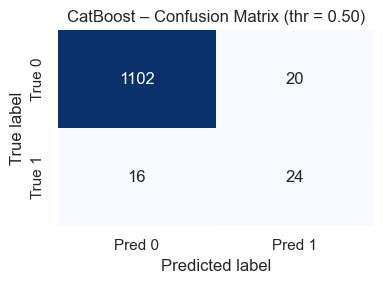

In [33]:
# 4.3 Confusion matrix heatmap (default threshold)

cm_cat = confusion_matrix(y_test, y_pred_cat)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm_cat,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["True 0", "True 1"]
)
plt.title("CatBoost – Confusion Matrix (thr = 0.50)")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()


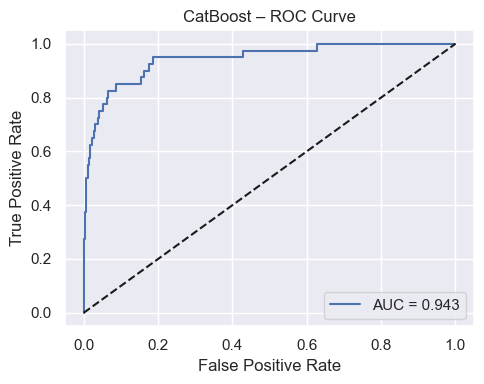

In [34]:
# 4.4 ROC curve

fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)

plt.figure(figsize=(5, 4))
plt.plot(fpr_cat, tpr_cat, label=f"AUC = {roc_auc_cat:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("CatBoost – ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

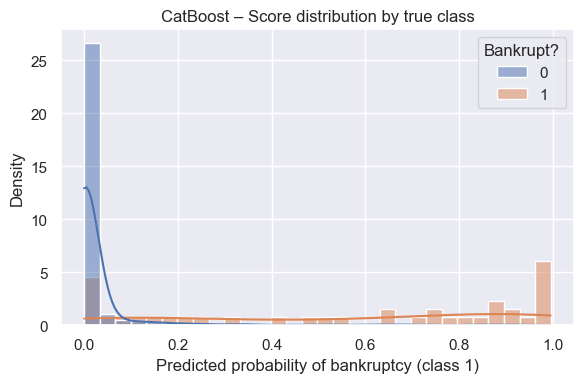

In [35]:
# 4.5 Score / probability distribution

plt.figure(figsize=(6, 4))
sns.histplot(
    x=y_proba_cat,
    hue=y_test,
    bins=30,
    kde=True,
    stat="density",
    common_norm=False,
    alpha=0.5
)
plt.xlabel("Predicted probability of bankruptcy (class 1)")
plt.title("CatBoost – Score distribution by true class")
plt.tight_layout()
plt.show()


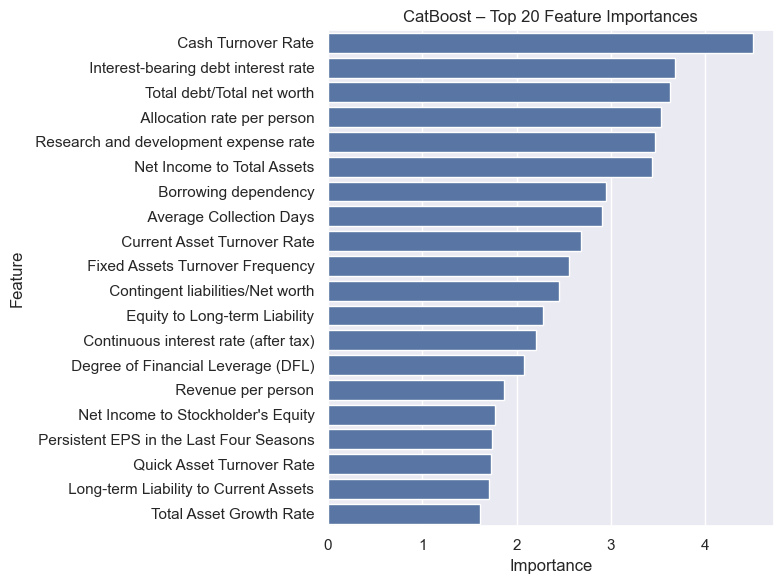

,feature,importance
73,Cash Turnover Rate,4.501174
13,Interest-bearing debt interest rate,3.677084
35,Total debt/Total net worth,3.628610
52,Allocation rate per person,3.532046
11,Research and development expense rate,3.461305
85,Net Income to Total Assets,3.437754
39,Borrowing dependency,2.950669
46,Average Collection Days,2.904192
70,Current Asset Turnover Rate,2.683220
48,Fixed Assets Turnover Frequency,2.553836


In [36]:
# 4.6 Feature importance for CatBoost

# CatBoost has its own feature importance method
importances_cat = cat_model.get_feature_importance()
feature_names_cat = X_train_resampled.columns

feat_imp_cat = pd.DataFrame({
    "feature": feature_names_cat,
    "importance": importances_cat
}).sort_values(by="importance", ascending=False)

top_n = 20
top_feat_imp_cat = feat_imp_cat.head(top_n)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_feat_imp_cat,
    x="importance",
    y="feature"
)
plt.title(f"CatBoost – Top {top_n} Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

top_feat_imp_cat


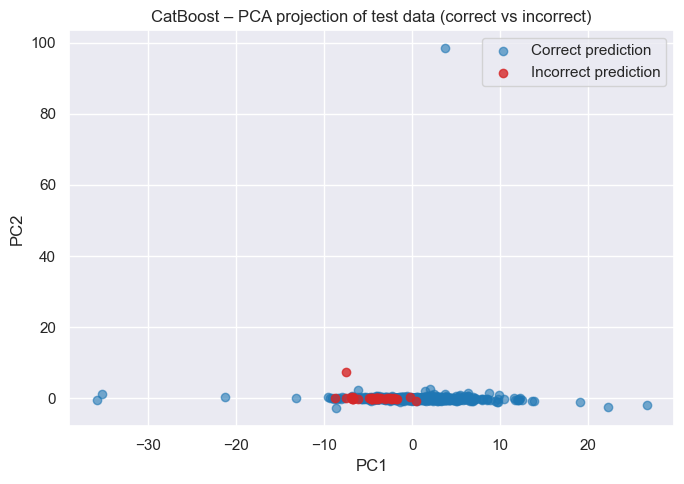

In [37]:
# 4.7 PCA visualization – CatBoost correct vs wrong

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Convert X_test to array if it is a DataFrame
X_test_array = X_test.values if hasattr(X_test, "values") else X_test

# Standardize features before PCA
scaler_pca = StandardScaler()
X_test_scaled_for_pca = scaler_pca.fit_transform(X_test_array)

# Fit PCA to 2 components
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_test_pca = pca.fit_transform(X_test_scaled_for_pca)

# Use custom-threshold predictions to define correct/incorrect
correct_mask_cat = (y_test.values == y_pred_cat_custom)

plt.figure(figsize=(7, 5))
plt.scatter(
    X_test_pca[correct_mask_cat, 0],
    X_test_pca[correct_mask_cat, 1],
    c="tab:blue",
    alpha=0.6,
    label="Correct prediction"
)
plt.scatter(
    X_test_pca[~correct_mask_cat, 0],
    X_test_pca[~correct_mask_cat, 1],
    c="tab:red",
    alpha=0.8,
    label="Incorrect prediction"
)

plt.title("CatBoost – PCA projection of test data (correct vs incorrect)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()



In [38]:
# 4.8 Summary table of CatBoost metrics

cat_summary = pd.DataFrame({
    "Model": ["CatBoost"],
    "Threshold": [best_thr_cat],
    "Accuracy": [accuracy_cat_custom],
    "Precision": [precision_cat_custom],
    "Recall": [recall_cat_custom],
    "F1-score": [f1_cat_custom],
    "ROC-AUC": [roc_auc_cat],
    "PR-AUC": [pr_auc_cat],
})

cat_summary

,Model,Threshold,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC
0,CatBoost,0.35,0.965577,0.5,0.65,0.565217,0.942825,0.599399


### Model 5: XGBoost


**Step 5.1: Train the XGBoost model**

In [40]:
# Train the XGBoost model

%pip install xgboost
from xgboost import XGBClassifier

# Define the XGBoost classifier with reasonable starting hyperparameters.
# These can be tuned later if needed.
xgb_model = XGBClassifier(
    n_estimators=400,       # number of trees
    max_depth=4,           # depth of each tree (controls complexity)
    learning_rate=0.05,    # step size shrinkage
    subsample=0.8,         # row subsampling
    colsample_bytree=0.8,  # feature subsampling
    objective="binary:logistic",  # binary classification with probability output
    eval_metric="logloss",        # evaluation metric used during training
    random_state=RANDOM_STATE,
    n_jobs=-1              # use all available CPU cores
)

# Fit on the SMOTE-balanced training data
xgb_model.fit(X_train_resampled, y_train_resampled)

print("XGBoost model trained on SMOTE-balanced data.")


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   --- ------------------------------------ 6.0/72.0 MB 43.8 MB/s eta 0:00:02
   ---------- ----------------------------- 19.1/72.0 MB 54.4 MB/s eta 0:00:01
   ----------------- ---------------------- 32.2/72.0 MB 56.9 MB/s eta 0:00:01
   ------------------------- -------------- 46.7/72.0 MB 59.7 MB/s eta 0:00:01
   ------------------------------- -------- 55.8/72.0 MB 55.9 MB/s eta 0:00:01
   ----------------------------------- ---- 63.4/72.0 MB 52.4 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 53.8 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 49.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


XGBoost model trained on SMOTE-balanced data.


**Step 5.2 Evaluation Metrics and Diagnostic Plots**

In [41]:
# Evaluate the XGBoost model on the test set

# from sklearn.metrics import (
#     confusion_matrix,
#     classification_report,
#     roc_curve,
#     roc_auc_score,
#     precision_recall_fscore_support
# )

# # Make predictions and get predicted probabilities
# #y_pred_xgb = xgb_model.predict(X_test)                      # predicted class labels (0/1)
# y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]         # predicted probability of class 1

# # Compute core metrics
# accuracy_xgb = (y_pred_xgb == y_test).mean()
# precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
#     y_test, y_pred_xgb, average="binary", pos_label=1
# )
# roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# print("=== XGBoost Performance on Test Set ===")
# print(f"Accuracy : {accuracy_xgb:.4f}")
# print(f"Precision: {precision_xgb:.4f}")
# print(f"Recall   : {recall_xgb:.4f}")
# print(f"F1-score : {f1_xgb:.4f}")
# print(f"ROC-AUC  : {roc_auc_xgb:.4f}\n")

# print("Classification Report:")
# print(classification_report(y_test, y_pred_xgb, digits=4))



# Evaluate the XGBoost model on the test set

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_fscore_support,
    precision_score,
    recall_score,
    f1_score
)

# Make predictions the standard (default) way
#    Note: predict() internally uses threshold = 0.50
y_pred_xgb = xgb_model.predict(X_test)               # class labels (0/1)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # probability of class 1 (bankrupt)

# Compute core metrics with the DEFAULT threshold (0.50)
accuracy_xgb = (y_pred_xgb == y_test).mean()
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary", pos_label=1
)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print("=== XGBoost Performance on Test Set (threshold = 0.50) ===")
print(f"Accuracy : {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall   : {recall_xgb:.4f}")
print(f"F1-score : {f1_xgb:.4f}")
print(f"ROC-AUC  : {roc_auc_xgb:.4f}\n")

print("Classification Report (threshold = 0.50):")
print(classification_report(y_test, y_pred_xgb, digits=4))


# OPTIONAL: Sweep thresholds to see how recall changes
print("\n=== Threshold sweep for XGBoost (precision vs recall trade-off) ===")
thresholds = [0.50, 0.45, 0.40, 0.35, 0.30, 0.25]

print("Threshold  Precision  Recall  F1")
for thr in thresholds:
    y_pred_thr = (y_proba_xgb >= thr).astype(int)
    prec = precision_score(y_test, y_pred_thr, pos_label=1)
    rec  = recall_score(y_test, y_pred_thr, pos_label=1)
    f1   = f1_score(y_test, y_pred_thr, pos_label=1)
    print(f"{thr:8.2f}  {prec:9.3f}  {rec:6.3f}  {f1:5.3f}")

# OPTIONAL: Choose a custom threshold if you want higher recall
#    (change this after looking at the table above)
best_thr = 0.35   # <-- pick a value that gives you better recall

y_pred_xgb_custom = (y_proba_xgb >= best_thr).astype(int)

accuracy_xgb_custom = (y_pred_xgb_custom == y_test).mean()
precision_xgb_custom = precision_score(y_test, y_pred_xgb_custom, pos_label=1)
recall_xgb_custom    = recall_score(y_test, y_pred_xgb_custom, pos_label=1)
f1_xgb_custom        = f1_score(y_test, y_pred_xgb_custom, pos_label=1)
cm_xgb_custom        = confusion_matrix(y_test, y_pred_xgb_custom)

print(f"\n=== XGBoost Performance with custom threshold = {best_thr:.2f} ===")
print(f"Accuracy : {accuracy_xgb_custom:.4f}")
print(f"Precision: {precision_xgb_custom:.4f}")
print(f"Recall   : {recall_xgb_custom:.4f}")
print(f"F1-score : {f1_xgb_custom:.4f}")
print("Confusion matrix:\n", cm_xgb_custom)



=== XGBoost Performance on Test Set (threshold = 0.50) ===
Accuracy : 0.9707
Precision: 0.5789
Recall   : 0.5500
F1-score : 0.5641
ROC-AUC  : 0.9422

Classification Report (threshold = 0.50):
              precision    recall  f1-score   support

           0     0.9840    0.9857    0.9849      1122
           1     0.5789    0.5500    0.5641        40

    accuracy                         0.9707      1162
   macro avg     0.7815    0.7679    0.7745      1162
weighted avg     0.9700    0.9707    0.9704      1162


=== Threshold sweep for XGBoost (precision vs recall trade-off) ===
Threshold  Precision  Recall  F1
    0.50      0.579   0.550  0.564
    0.45      0.511   0.575  0.541
    0.40      0.491   0.650  0.559
    0.35      0.482   0.675  0.562
    0.30      0.438   0.700  0.538
    0.25      0.433   0.725  0.542

=== XGBoost Performance with custom threshold = 0.35 ===
Accuracy : 0.9639
Precision: 0.4821
Recall   : 0.6750
F1-score : 0.5625
Confusion matrix:
 [[1093   29]
 [  13 

**Step 5.3: Confusion Matrix**

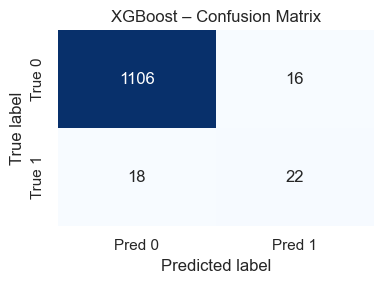

In [42]:
# Confusion matrix heatmap
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["True 0", "True 1"]
)
plt.title("XGBoost – Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

**Step 5.4: ROC curve**

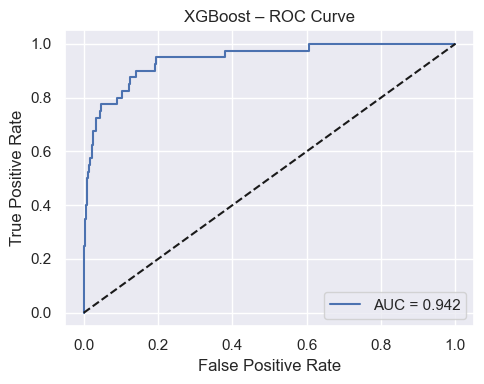

In [43]:
# ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(5, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC = {roc_auc_xgb:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost – ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Step 5.5: Score Distribution by True Class**


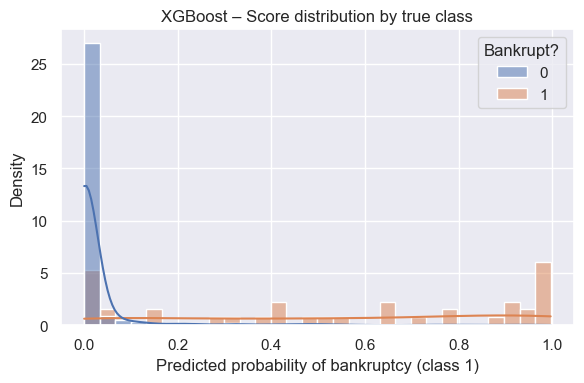

In [44]:
# Score / probability distribution
plt.figure(figsize=(6, 4))
sns.histplot(
    x=y_proba_xgb,
    hue=y_test,
    bins=30,
    kde=True,
    stat="density",
    common_norm=False,
    alpha=0.5
)
plt.xlabel("Predicted probability of bankruptcy (class 1)")
plt.title("XGBoost – Score distribution by true class")
plt.tight_layout()
plt.show()

**Step 5.6: Feature Importance (Which variables matter most?)**

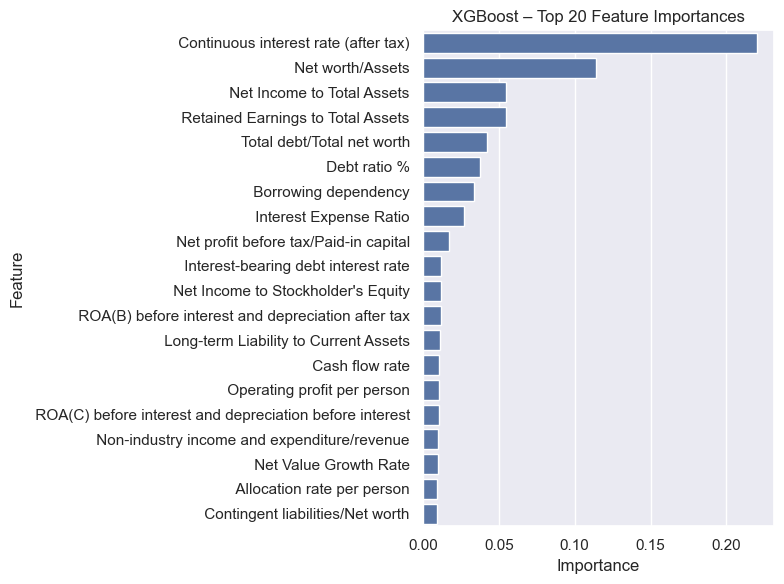

,feature,importance
9,Continuous interest rate (after tax),0.220327
37,Net worth/Assets,0.114110
85,Net Income to Total Assets,0.054985
67,Retained Earnings to Total Assets,0.054782
35,Total debt/Total net worth,0.042107
36,Debt ratio %,0.037726
39,Borrowing dependency,0.033701
34,Interest Expense Ratio,0.027116
42,Net profit before tax/Paid-in capital,0.017070
13,Interest-bearing debt interest rate,0.012152


In [45]:
# Feature importance for XGBoost

importances = xgb_model.feature_importances_
feature_names = X_train_resampled.columns

feat_imp_xgb = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

top_n = 20  # show top 20 features
top_feat_imp_xgb = feat_imp_xgb.head(top_n)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_feat_imp_xgb,
    x="importance",
    y="feature"
)
plt.title(f"XGBoost – Top {top_n} Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

top_feat_imp_xgb


**Step 5.7: PCA Visualization: Correct vs Incorrect Predictions**

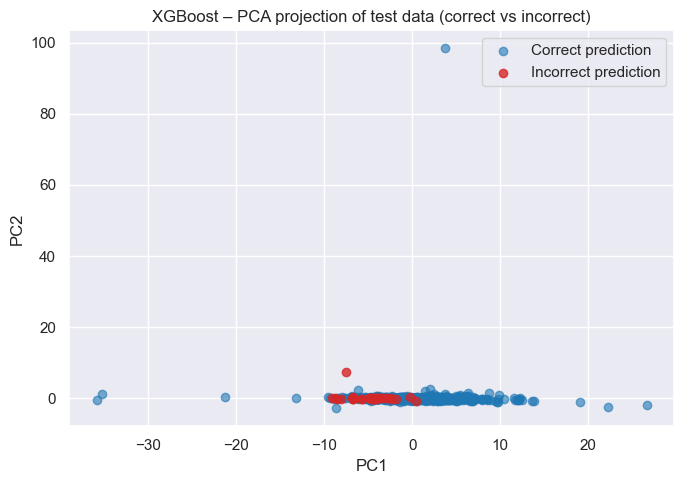

In [46]:
# PCA visualization – where does XGBoost get it right or wrong?

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Convert X_test to array if it is a DataFrame
X_test_array = X_test.values if hasattr(X_test, "values") else X_test

# Standardize features before PCA
scaler_pca = StandardScaler()
X_test_scaled_for_pca = scaler_pca.fit_transform(X_test_array)

# Fit PCA to 2 components
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_test_pca = pca.fit_transform(X_test_scaled_for_pca)

# Mark correct vs incorrect predictions
correct_mask = (y_test.values == y_pred_xgb)

plt.figure(figsize=(7, 5))
plt.scatter(
    X_test_pca[correct_mask, 0],
    X_test_pca[correct_mask, 1],
    c="tab:blue",
    alpha=0.6,
    label="Correct prediction"
)
plt.scatter(
    X_test_pca[~correct_mask, 0],
    X_test_pca[~correct_mask, 1],
    c="tab:red",
    alpha=0.8,
    label="Incorrect prediction"
)

plt.title("XGBoost – PCA projection of test data (correct vs incorrect)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()


**Step 5.8: Summary of XGBoost Results**

In [47]:
# Summary table of XGBoost metrics

xgb_summary = pd.DataFrame({
    "Model": ["XGBoost"],
    "Accuracy": [accuracy_xgb_custom],
    "Precision": [precision_xgb_custom],
    "Recall": [recall_xgb_custom],
    "F1-score": [f1_xgb_custom],
    "ROC-AUC": [roc_auc_xgb],
})

xgb_summary


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,XGBoost,0.963855,0.482143,0.675,0.5625,0.942224


### Model 6: Multi-Layer Perceptron (MLP) Models for Bankruptcy Prediction

**Step 6.1: Imports needed specifically for MLP modeling**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_fscore_support
)


**Step 6.2 Standardize features and train a baseline MLP**

In [49]:
# Standardize features and train a baseline MLP

# Standardize features for MLP (neural networks are sensitive to feature scale)
scaler_mlp = StandardScaler()

# Fit the scaler on SMOTE-resampled training data and transform both train and test
X_train_resampled_scaled = scaler_mlp.fit_transform(X_train_resampled)
X_test_scaled = scaler_mlp.transform(X_test)

print("Scaled training shape:", X_train_resampled_scaled.shape)
print("Scaled test shape    :", X_test_scaled.shape)

# Define a reasonable baseline MLP configuration
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # 2 hidden layers with 64 and 32 neurons
    activation="relu",            # ReLU non-linearity
    solver="adam",                # Adaptive optimizer
    alpha=1e-4,                   # L2 regularization strength
    batch_size=64,
    learning_rate="adaptive",     # Adapts learning rate based on validation score
    max_iter=300,                 # Max number of training epochs
    random_state=RANDOM_STATE,
    verbose=False
)

# Train MLP on SMOTE-balanced and scaled data
mlp_model.fit(X_train_resampled_scaled, y_train_resampled)

print("Baseline MLP model trained.")
print("Number of iterations until convergence:", mlp_model.n_iter_)


Scaled training shape: (8974, 95)
Scaled test shape    : (1162, 95)
Baseline MLP model trained.
Number of iterations until convergence: 40


**Step 6.3 Evaluate the baseline MLP on the scaled test set**

In [50]:
#  Predictions and predicted probabilities ---
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_proba_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]  # probability of class 1 (bankrupt)

# Core metrics
accuracy_mlp = (y_pred_mlp == y_test).mean()
precision_mlp, recall_mlp, f1_mlp, _ = precision_recall_fscore_support(
    y_test, y_pred_mlp, average="binary", pos_label=1
)
roc_auc_mlp = roc_auc_score(y_test, y_proba_mlp)

print("Baseline MLP Performance on Test Set")
print(f"Accuracy : {accuracy_mlp:.4f}")
print(f"Precision: {precision_mlp:.4f}")
print(f"Recall   : {recall_mlp:.4f}")
print(f"F1-score : {f1_mlp:.4f}")
print(f"ROC-AUC  : {roc_auc_mlp:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_mlp, digits=4))



Baseline MLP Performance on Test Set
Accuracy : 0.9647
Precision: 0.4878
Recall   : 0.5000
F1-score : 0.4938
ROC-AUC  : 0.8924

Classification Report:
              precision    recall  f1-score   support

           0     0.9822    0.9813    0.9817      1122
           1     0.4878    0.5000    0.4938        40

    accuracy                         0.9647      1162
   macro avg     0.7350    0.7406    0.7378      1162
weighted avg     0.9651    0.9647    0.9649      1162



**Step 6.4 Confusion Matrix**

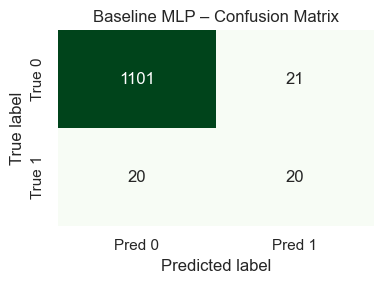

In [51]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm_mlp,
    annot=True,
    fmt="d",
    cmap="Greens",
    cbar=False,
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["True 0", "True 1"]
)
plt.title("Baseline MLP – Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

**Step 6.5 ROC Curve**

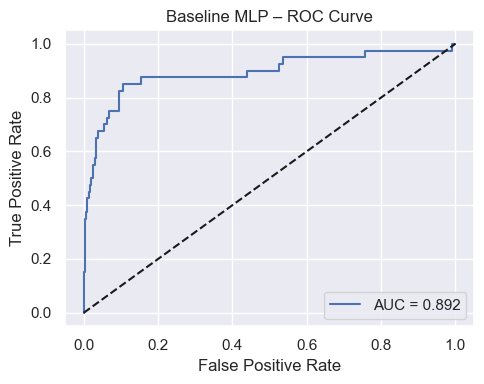

In [52]:
# ROC curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)

plt.figure(figsize=(5, 4))
plt.plot(fpr_mlp, tpr_mlp, label=f"AUC = {roc_auc_mlp:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Baseline MLP – ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Step 6.6 Score and Probability distribution**

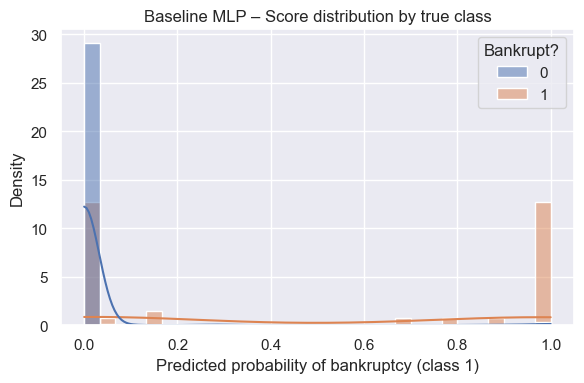

In [53]:
#  Score / probability distribution
plt.figure(figsize=(6, 4))
sns.histplot(
    x=y_proba_mlp,
    hue=y_test,
    bins=30,
    kde=True,
    stat="density",
    common_norm=False,
    alpha=0.5
)
plt.xlabel("Predicted probability of bankruptcy (class 1)")
plt.title("Baseline MLP – Score distribution by true class")
plt.tight_layout()
plt.show()


**Step 6.7: PCA Visualization**

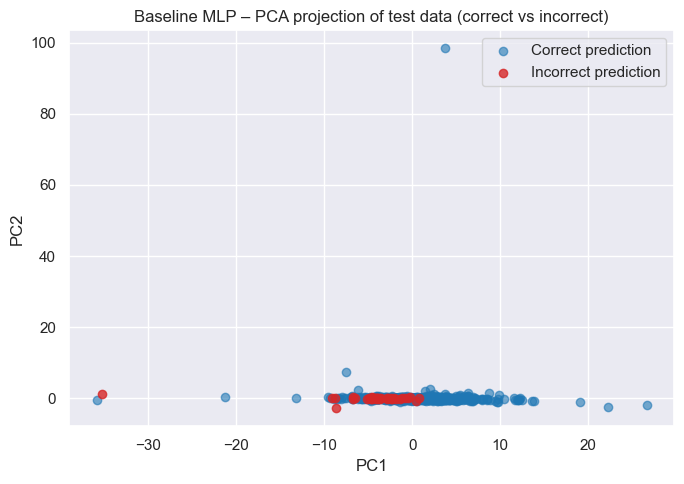

In [54]:
# PCA visualization – where does baseline MLP get it right or wrong?

# Use original X_test (not scaled), PCA will have its own scaler
X_test_array = X_test.values if hasattr(X_test, "values") else X_test

# Standardize features for PCA (separate from the model's scaler)
scaler_pca_mlp = StandardScaler()
X_test_scaled_for_pca_mlp = scaler_pca_mlp.fit_transform(X_test_array)

# Fit PCA to 2 components
pca_mlp = PCA(n_components=2, random_state=RANDOM_STATE)
X_test_pca_mlp = pca_mlp.fit_transform(X_test_scaled_for_pca_mlp)

# Correct vs incorrect predictions
correct_mask_mlp = (y_test.values == y_pred_mlp)

plt.figure(figsize=(7, 5))
plt.scatter(
    X_test_pca_mlp[correct_mask_mlp, 0],
    X_test_pca_mlp[correct_mask_mlp, 1],
    c="tab:blue",
    alpha=0.6,
    label="Correct prediction"
)
plt.scatter(
    X_test_pca_mlp[~correct_mask_mlp, 0],
    X_test_pca_mlp[~correct_mask_mlp, 1],
    c="tab:red",
    alpha=0.8,
    label="Incorrect prediction"
)

plt.title("Baseline MLP – PCA projection of test data (correct vs incorrect)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()


**Step 6.8 Summary of MLP**

In [55]:
# Summary table of baseline MLP metrics

mlp_summary = pd.DataFrame({
    "Model": ["MLP (baseline)"],
    "Accuracy": [accuracy_mlp],
    "Precision": [precision_mlp],
    "Recall": [recall_mlp],
    "F1-score": [f1_mlp],
    "ROC-AUC": [roc_auc_mlp],
})

mlp_summary


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,MLP (baseline),0.964716,0.487805,0.5,0.493827,0.892424


**Step 6.9 Advanced MLP Pipeline (SMOTE → Scaling → MLP) With RandomizedSearchCV**

In [56]:
# Define Pipeline (SMOTE + Scaling + MLP) and tune with RandomizedSearchCV

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

# Pipeline:
#   1) SMOTE (handles class imbalance inside each CV fold)
#   2) StandardScaler (feature scaling)
#   3) MLPClassifier with early stopping
mlp_pipe = Pipeline(steps=[
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        max_iter=300,
        early_stopping=True,       # internal validation set
        validation_fraction=0.1,   # 10% of training data as validation
        n_iter_no_change=10,       # stop if no improvement
        random_state=RANDOM_STATE,
        verbose=False
    ))
])

# Hyperparameter search space for the MLP part of the pipeline
param_distributions = {
    "mlp__hidden_layer_sizes": [
        (64,),          # 1 hidden layer
        (64, 32),       # 2 hidden layers
        (128, 64),
        (128, 64, 32),  # 3 hidden layers
    ],
    "mlp__alpha": [1e-5, 1e-4, 1e-3, 1e-2],              # L2 regularization
    "mlp__batch_size": [32, 64, 128],                   # mini-batch sizes
    "mlp__learning_rate_init": [0.0005, 0.001, 0.01],   # initial learning rate
}

# RandomizedSearchCV – explores a subset of hyperparameter combinations
mlp_random_search = RandomizedSearchCV(
    estimator=mlp_pipe,
    param_distributions=param_distributions,
    n_iter=12,              # number of random configurations (increase for deeper tuning)
    scoring="roc_auc",      # focus on ROC–AUC
    n_jobs=-1,
    cv=3,                   # 3-fold cross-validation
    verbose=2,
    random_state=RANDOM_STATE
)

print("Starting advanced MLP hyperparameter tuning...")
mlp_random_search.fit(X_train, y_train)  # SMOTE & scaling happen inside CV folds

print("\nBest ROC-AUC (CV):", mlp_random_search.best_score_)
print("Best parameters found:")
for k, v in mlp_random_search.best_params_.items():
    print(f"  {k}: {v}")


Starting advanced MLP hyperparameter tuning...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best ROC-AUC (CV): 0.8379570035073582
Best parameters found:
  mlp__learning_rate_init: 0.01
  mlp__hidden_layer_sizes: (64, 32)
  mlp__batch_size: 128
  mlp__alpha: 0.0001


**Step 6.10 Tuned MLP - Model Evaluation**

In [57]:
# Extract best tuned MLP pipeline and evaluate on the test set

# Best MLP pipeline (includes SMOTE + scaling + MLP)
best_mlp_pipe = mlp_random_search.best_estimator_
print("Best MLP pipeline:\n", best_mlp_pipe)

# Predict on test set (pipeline handles scaling automatically)
y_pred_mlp_tuned = best_mlp_pipe.predict(X_test)
y_proba_mlp_tuned = best_mlp_pipe.predict_proba(X_test)[:, 1]

# --- Metrics ---
accuracy_mlp_tuned = (y_pred_mlp_tuned == y_test).mean()
precision_mlp_tuned, recall_mlp_tuned, f1_mlp_tuned, _ = precision_recall_fscore_support(
    y_test, y_pred_mlp_tuned, average="binary", pos_label=1
)
roc_auc_mlp_tuned = roc_auc_score(y_test, y_proba_mlp_tuned)

print("\n=== Tuned MLP Performance on Test Set ===")
print(f"Accuracy : {accuracy_mlp_tuned:.4f}")
print(f"Precision: {precision_mlp_tuned:.4f}")
print(f"Recall   : {recall_mlp_tuned:.4f}")
print(f"F1-score : {f1_mlp_tuned:.4f}")
print(f"ROC-AUC  : {roc_auc_mlp_tuned:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_mlp_tuned, digits=4))


Best MLP pipeline:
 Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(batch_size=128, early_stopping=True,
                               hidden_layer_sizes=(64, 32),
                               learning_rate_init=0.01, max_iter=300,
                               random_state=42))])

=== Tuned MLP Performance on Test Set ===
Accuracy : 0.9639
Precision: 0.4773
Recall   : 0.5250
F1-score : 0.5000
ROC-AUC  : 0.9022

Classification Report:
              precision    recall  f1-score   support

           0     0.9830    0.9795    0.9812      1122
           1     0.4773    0.5250    0.5000        40

    accuracy                         0.9639      1162
   macro avg     0.7301    0.7523    0.7406      1162
weighted avg     0.9656    0.9639    0.9647      1162



**Step 6.11 Tuned MLP: Confusion Matrix**


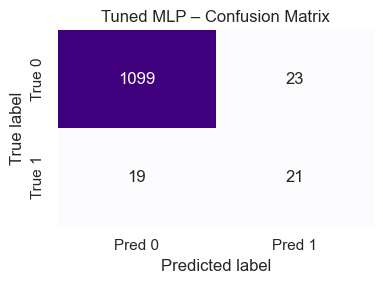

In [58]:
# Confusion matrix
cm_mlp_tuned = confusion_matrix(y_test, y_pred_mlp_tuned)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm_mlp_tuned,
    annot=True,
    fmt="d",
    cmap="Purples",
    cbar=False,
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["True 0", "True 1"]
)
plt.title("Tuned MLP – Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()


**Step 6.12 Tuned MLP - ROC Curve**

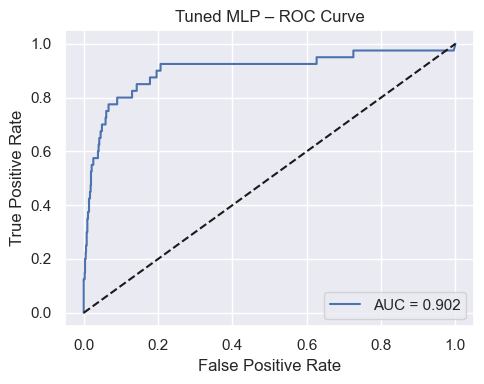

In [59]:
# ROC curve
fpr_mlp_tuned, tpr_mlp_tuned, _ = roc_curve(y_test, y_proba_mlp_tuned)

plt.figure(figsize=(5, 4))
plt.plot(fpr_mlp_tuned, tpr_mlp_tuned, label=f"AUC = {roc_auc_mlp_tuned:.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Tuned MLP – ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


**Step 6.13 Tuned MLP - Score Distribution**


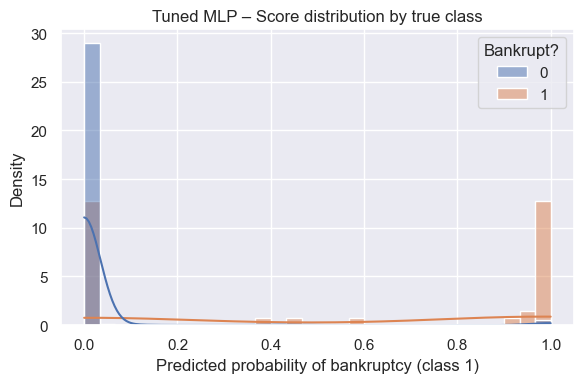

In [60]:
# Score distribution
plt.figure(figsize=(6, 4))
sns.histplot(
    x=y_proba_mlp_tuned,
    hue=y_test,
    bins=30,
    kde=True,
    stat="density",
    common_norm=False,
    alpha=0.5
)
plt.xlabel("Predicted probability of bankruptcy (class 1)")
plt.title("Tuned MLP – Score distribution by true class")
plt.tight_layout()
plt.show()

**Step 6.14 Tuned MLP - PCA Visualization**

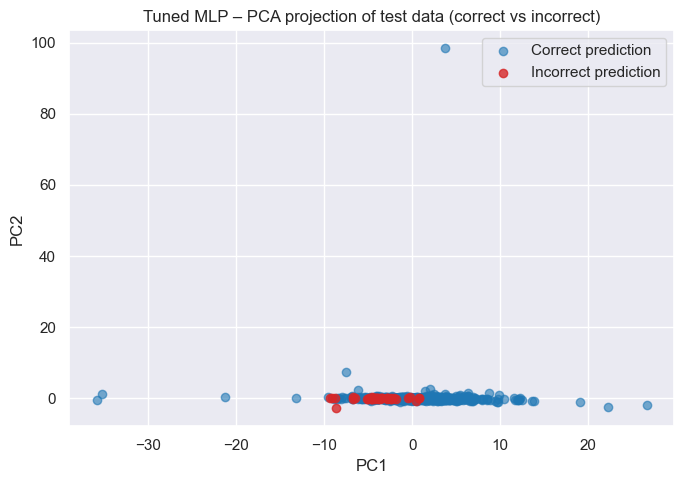

In [61]:
# 6.3 PCA visualization for the tuned MLP

# Use original X_test (best_mlp_pipe does its own scaling for predictions)
X_test_array = X_test.values if hasattr(X_test, "values") else X_test

# Standardize for PCA only (separate from the model's scaler)
scaler_pca_tuned = StandardScaler()
X_test_scaled_for_pca_tuned = scaler_pca_tuned.fit_transform(X_test_array)

pca_tuned = PCA(n_components=2, random_state=RANDOM_STATE)
X_test_pca_tuned = pca_tuned.fit_transform(X_test_scaled_for_pca_tuned)

correct_mask_mlp_tuned = (y_test.values == y_pred_mlp_tuned)

plt.figure(figsize=(7, 5))
plt.scatter(
    X_test_pca_tuned[correct_mask_mlp_tuned, 0],
    X_test_pca_tuned[correct_mask_mlp_tuned, 1],
    c="tab:blue",
    alpha=0.6,
    label="Correct prediction"
)
plt.scatter(
    X_test_pca_tuned[~correct_mask_mlp_tuned, 0],
    X_test_pca_tuned[~correct_mask_mlp_tuned, 1],
    c="tab:red",
    alpha=0.8,
    label="Incorrect prediction"
)

plt.title("Tuned MLP – PCA projection of test data (correct vs incorrect)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()


**Step 6.15 Summary & Comparison**

In [62]:
# Summary table for tuned MLP and comparison with baseline MLP

mlp_tuned_summary = pd.DataFrame({
    "Model": ["MLP (tuned)"],
    "Accuracy": [accuracy_mlp_tuned],
    "Precision": [precision_mlp_tuned],
    "Recall": [recall_mlp_tuned],
    "F1-score": [f1_mlp_tuned],
    "ROC-AUC": [roc_auc_mlp_tuned],
})

mlp_comparison = pd.concat([mlp_summary, mlp_tuned_summary], ignore_index=True)
mlp_comparison


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,MLP (baseline),0.964716,0.487805,0.500,0.493827,0.892424
1,MLP (tuned),0.963855,0.477273,0.525,0.500000,0.902150


**Step 6.16 Combine XGBoost, Baseline MLP, and Tuned MLP summaries**

In [63]:
models_to_concat = []

try:
    models_to_concat.append(xgb_summary)
except NameError:
    print("xgb_summary not found – did you run the XGBoost section?")

try:
    models_to_concat.append(mlp_summary)
except NameError:
    print("mlp_summary not found – did you run the baseline MLP section?")

try:
    models_to_concat.append(mlp_tuned_summary)
except NameError:
    print("mlp_tuned_summary not found – did you run the tuned MLP section?")

comparison_full = pd.concat(models_to_concat, ignore_index=True)
display(comparison_full)


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,XGBoost,0.963855,0.482143,0.675,0.562500,0.942224
1,MLP (baseline),0.964716,0.487805,0.500,0.493827,0.892424
2,MLP (tuned),0.963855,0.477273,0.525,0.500000,0.902150


**Step 6.17 Bar chart comparison of metrics across models**

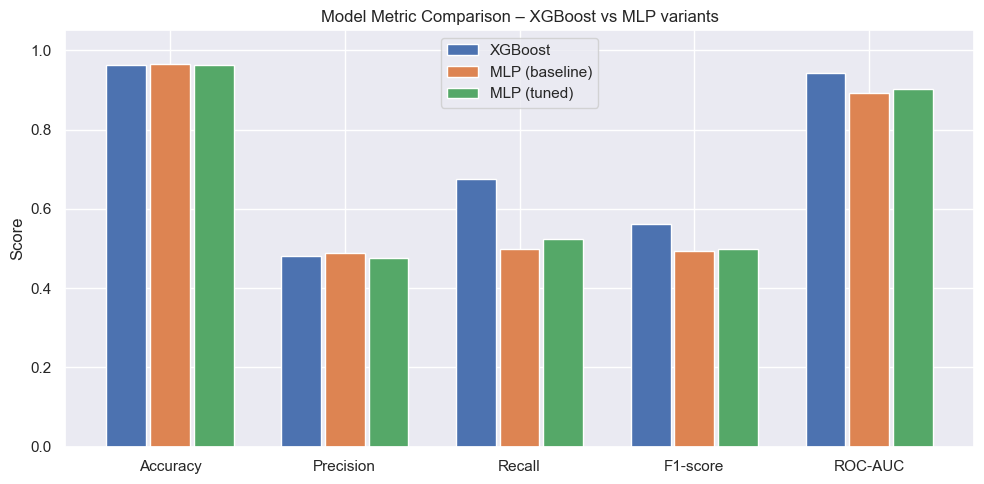

In [64]:
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

x = np.arange(len(metrics_to_plot))
width = 0.25  # width of bars

plt.figure(figsize=(10, 5))

# We expect at most 3 models: XGBoost, MLP (baseline), MLP (tuned)
num_models = comparison_full.shape[0]
offsets = np.linspace(-width, width, num_models)

for i in range(num_models):
    plt.bar(
        x + offsets[i],
        comparison_full.loc[i, metrics_to_plot],
        width / 1.1,
        label=comparison_full.loc[i, "Model"]
    )

plt.xticks(x, metrics_to_plot)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Model Metric Comparison – XGBoost vs MLP variants")
plt.legend()
plt.tight_layout()
plt.show()


**Step 6.18 Combined ROC curve - XGBoost vs MLP (baseline) vs MLP (tuned)**

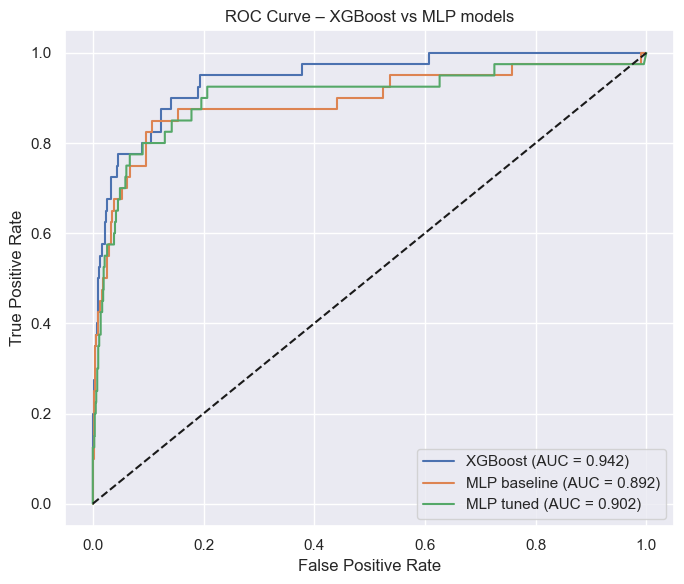

In [65]:
plt.figure(figsize=(7, 6))

# XGBoost
try:
    plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.3f})")
except NameError:
    print("XGBoost ROC variables not found – skipping XGBoost in ROC plot.")

# Baseline MLP
try:
    plt.plot(fpr_mlp, tpr_mlp, label=f"MLP baseline (AUC = {roc_auc_mlp:.3f})")
except NameError:
    print("Baseline MLP ROC variables not found – skipping baseline MLP in ROC plot.")

# Tuned MLP
try:
    plt.plot(fpr_mlp_tuned, tpr_mlp_tuned, label=f"MLP tuned (AUC = {roc_auc_mlp_tuned:.3f})")
except NameError:
    print("Tuned MLP ROC variables not found – skipping tuned MLP in ROC plot.")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost vs MLP models")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


### Model 7: Gaussian Naive Bayes

**Step 7.1: Basic Info about Model**
  - (main focus on Guassian)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_recall_fscore_support
)

In [67]:
# Gaussian Naive Bayes (NB)

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# Standardize features for NB
scaler_nb = StandardScaler()
X_train_nb = scaler_nb.fit_transform(X_train_resampled)
X_test_nb  = scaler_nb.transform(X_test)

# Train NB model
nb_clf = GaussianNB()
nb_clf.fit(X_train_nb, y_train_resampled)

# Predictions
y_pred_nb  = nb_clf.predict(X_test_nb)
y_proba_nb = nb_clf.predict_proba(X_test_nb)[:, 1]

# Metrics
nb_accuracy  = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb, zero_division=0)
nb_recall    = recall_score(y_test, y_pred_nb, zero_division=0)
nb_f1        = f1_score(y_test, y_pred_nb, zero_division=0)
nb_auc       = roc_auc_score(y_test, y_proba_nb)

cm_nb = confusion_matrix(y_test, y_pred_nb)

# Pretty Metric Table
print("\n~~~~~ Naive Bayes — Metrics Table ~~~~~")
print(f"{'Metric':<12} {'Score':>10}")
print("-" * 30)
print(f"{'Accuracy':<12} {nb_accuracy:>10.4f}")
print(f"{'Precision':<12} {nb_precision:>10.4f}")
print(f"{'Recall':<12} {nb_recall:>10.4f}")
print(f"{'F1-score':<12} {nb_f1:>10.4f}")
print(f"{'ROC AUC':<12} {nb_auc:>10.4f}")
print("-" * 30)

# Classification Report
print("\n~~~~ Gaussian Naive Bayes — Classification Report ~~~~")
print(classification_report(y_test, y_pred_nb, digits=4))




~~~~~ Naive Bayes — Metrics Table ~~~~~
Metric            Score
------------------------------
Accuracy         0.4260
Precision        0.0502
Recall           0.8750
F1-score         0.0950
ROC AUC          0.8054
------------------------------

~~~~ Gaussian Naive Bayes — Classification Report ~~~~
              precision    recall  f1-score   support

           0     0.9892    0.4100    0.5797      1122
           1     0.0502    0.8750    0.0950        40

    accuracy                         0.4260      1162
   macro avg     0.5197    0.6425    0.3373      1162
weighted avg     0.9569    0.4260    0.5630      1162



**Step 7.2: Confusion Matrix**

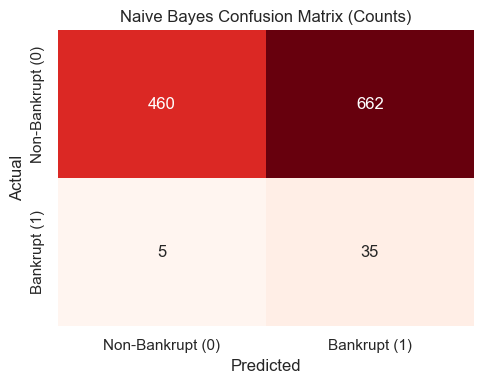

In [68]:
# Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(
    cm_nb,
    annot=True,
    fmt='d',
    cmap='Reds',
    xticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"],
    yticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"],
    cbar=False
)
plt.title("Naive Bayes Confusion Matrix (Counts)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**7.3: ROC Curve for NB**

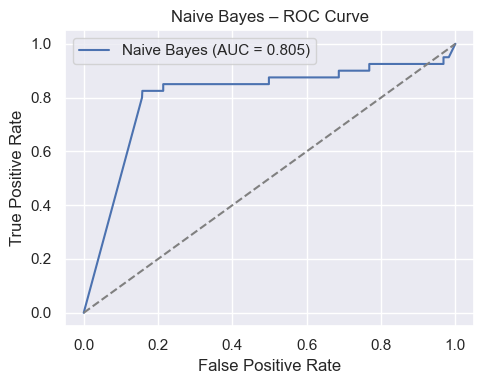

In [69]:
# ROC curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)

plt.figure(figsize=(5, 4))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {nb_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes – ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


**Step 7.4 - Extra Naive Bayes variants**

- Evaluated multiple Naive Bayes types (BernoulliNB, MultinomialNB, ComplementNB, CategoricalNB) on the same train-test split.


In [70]:
from sklearn.naive_bayes import (
    GaussianNB,
    BernoulliNB,
    MultinomialNB,
    ComplementNB,
    CategoricalNB,
)
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.metrics import (
    roc_auc_score,
    precision_recall_fscore_support,
)

nb_scores = []  # list of dicts → will become a table later

def eval_nb_model(name, y_true, y_pred, y_prob):
    """
    Score a Naive Bayes variant in a consistent way.
    Tracks accuracy, precision, recall, F1 and ROC–AUC for class 1.
    """
    acc = (y_true == y_pred).mean()
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="binary", pos_label=1, zero_division=0
    )
    auc = roc_auc_score(y_true, y_prob)

    nb_scores.append(
        {
            "model": name,
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1": f1,
            "auc": auc,
        }
    )


# 0: GaussianNB – baseline NB (use the SAME features you want, see note above)
g_nb = GaussianNB()
g_nb.fit(X_train_resampled, y_train_resampled)       # or X_train_nb if you prefer the scaled version
y_pred_g = g_nb.predict(X_test)
y_prob_g = g_nb.predict_proba(X_test)[:, 1]
eval_nb_model("GaussianNB", y_test, y_pred_g, y_prob_g)


# 1: BernoulliNB – binarise features using train medians
median_thr = X_train.median(axis=0)
X_train_bern = (X_train_resampled > median_thr).astype(int)
X_test_bern  = (X_test  > median_thr).astype(int)

bern_nb = BernoulliNB()
bern_nb.fit(X_train_bern, y_train_resampled)
y_pred_bern = bern_nb.predict(X_test_bern)
y_prob_bern = bern_nb.predict_proba(X_test_bern)[:, 1]
eval_nb_model("BernoulliNB", y_test, y_pred_bern, y_prob_bern)


# 2: MultinomialNB – needs non-negative features → MinMax scale + clip
mm_scaler = MinMaxScaler()
X_train_mm = mm_scaler.fit_transform(X_train_resampled.clip(lower=0))
X_test_mm  = mm_scaler.transform(X_test.clip(lower=0))

multi_nb = MultinomialNB()
multi_nb.fit(X_train_mm, y_train_resampled)
y_pred_multi = multi_nb.predict(X_test_mm)
y_prob_multi = multi_nb.predict_proba(X_test_mm)[:, 1]
eval_nb_model("MultinomialNB", y_test, y_pred_multi, y_prob_multi)


# 3: ComplementNB – often better on imbalanced data (reuse MinMax data)
comp_nb = ComplementNB()
comp_nb.fit(X_train_mm, y_train_resampled)
y_pred_comp = comp_nb.predict(X_test_mm)
y_prob_comp = comp_nb.predict_proba(X_test_mm)[:, 1]
eval_nb_model("ComplementNB", y_test, y_pred_comp, y_prob_comp)


# 4: CategoricalNB – discretise each feature into ordinal bins
kb = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile")
X_train_cat = kb.fit_transform(X_train)
X_test_cat  = kb.transform(X_test)

cat_nb = CategoricalNB()
cat_nb.fit(X_train_cat, y_train)
y_pred_cat = cat_nb.predict(X_test_cat)
y_prob_cat = cat_nb.predict_proba(X_test_cat)[:, 1]
eval_nb_model("CategoricalNB", y_test, y_pred_cat, y_prob_cat)


C:\Users\ayush\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 11 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 14 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python313\site-packages\

In [71]:
# Turn list of dicts into a nice DataFrame and sort by AUC (or accuracy)
nb_results_df = (
    pd.DataFrame(nb_scores)
      .sort_values("auc", ascending=False)
      .reset_index(drop=True)
)

# round for cleaner printing
nb_results_df = nb_results_df.round(4)

nb_results_df


,model,accuracy,precision,recall,f1,auc
0,CategoricalNB,0.8244,0.1555,0.925,0.2662,0.9315
1,BernoulliNB,0.7900,0.1304,0.900,0.2278,0.9179
2,MultinomialNB,0.7952,0.1250,0.825,0.2171,0.8656
3,ComplementNB,0.7952,0.1250,0.825,0.2171,0.8656
4,GaussianNB,0.0792,0.0352,0.975,0.0679,0.7288


**Step 7.5: Naive Bayes Family - Confusion Matrices**



~~~~ GaussianNB – Classification report ~~~~
                  precision    recall  f1-score   support

Non-Bankrupt (0)     0.9815    0.0472    0.0901      1122
    Bankrupt (1)     0.0352    0.9750    0.0679        40

        accuracy                         0.0792      1162
       macro avg     0.5083    0.5111    0.0790      1162
    weighted avg     0.9489    0.0792    0.0894      1162



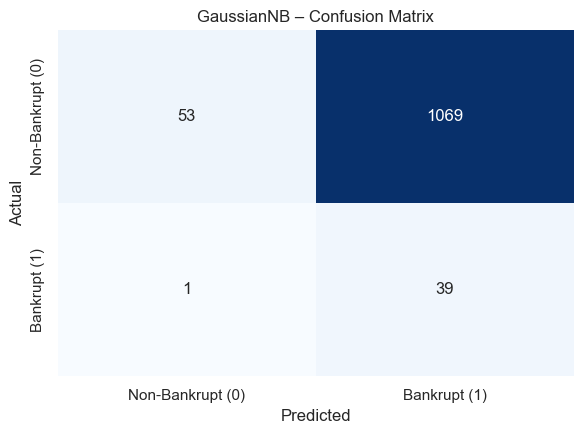


~~~~ BernoulliNB – Classification report ~~~~
                  precision    recall  f1-score   support

Non-Bankrupt (0)     0.9955    0.7861    0.8785      1122
    Bankrupt (1)     0.1304    0.9000    0.2278        40

        accuracy                         0.7900      1162
       macro avg     0.5630    0.8430    0.5532      1162
    weighted avg     0.9657    0.7900    0.8561      1162



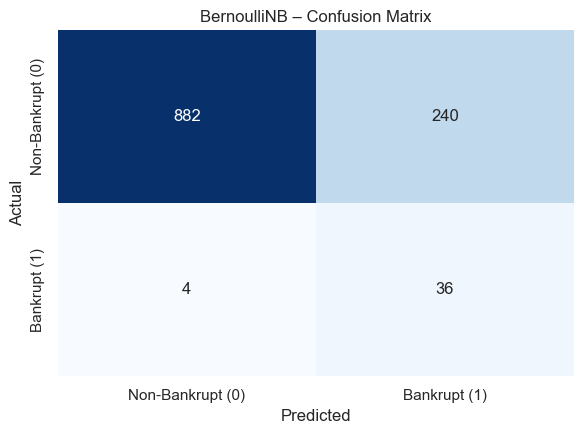


~~~~ MultinomialNB – Classification report ~~~~
                  precision    recall  f1-score   support

Non-Bankrupt (0)     0.9922    0.7941    0.8822      1122
    Bankrupt (1)     0.1250    0.8250    0.2171        40

        accuracy                         0.7952      1162
       macro avg     0.5586    0.8096    0.5496      1162
    weighted avg     0.9624    0.7952    0.8593      1162



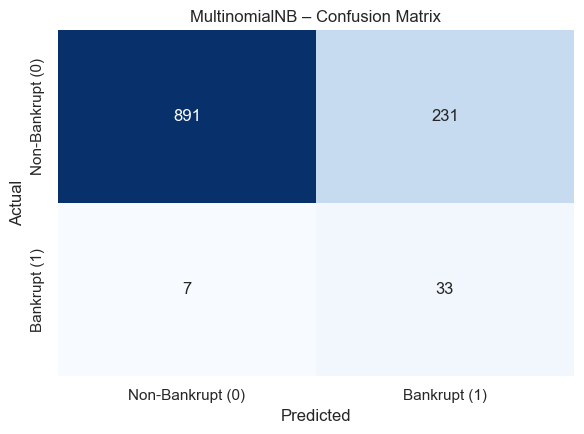


~~~~ ComplementNB – Classification report ~~~~
                  precision    recall  f1-score   support

Non-Bankrupt (0)     0.9922    0.7941    0.8822      1122
    Bankrupt (1)     0.1250    0.8250    0.2171        40

        accuracy                         0.7952      1162
       macro avg     0.5586    0.8096    0.5496      1162
    weighted avg     0.9624    0.7952    0.8593      1162



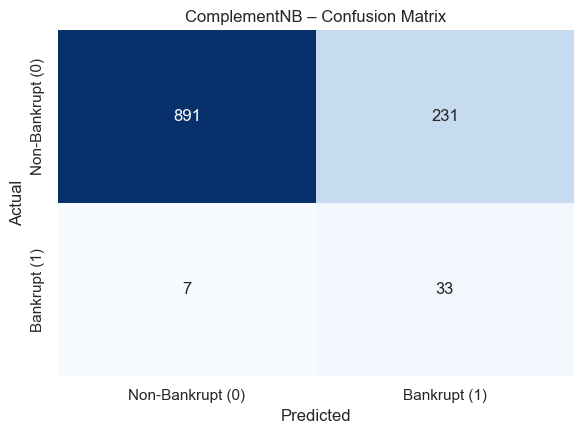


~~~~ CategoricalNB – Classification report ~~~~
                  precision    recall  f1-score   support

Non-Bankrupt (0)     0.9968    0.8209    0.9003      1122
    Bankrupt (1)     0.1555    0.9250    0.2662        40

        accuracy                         0.8244      1162
       macro avg     0.5761    0.8729    0.5832      1162
    weighted avg     0.9678    0.8244    0.8785      1162



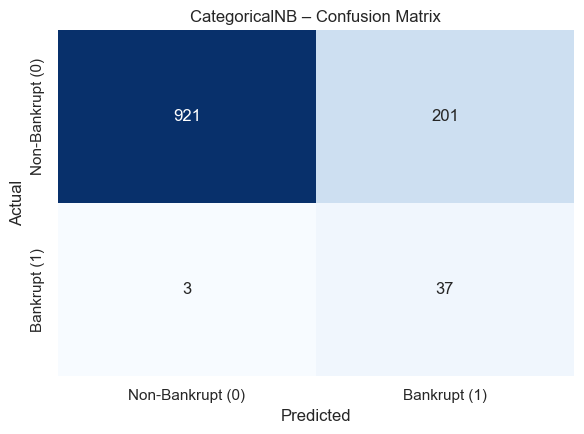

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nb_predictions = {
    "GaussianNB":   (y_pred_g,    y_prob_g),
    "BernoulliNB":  (y_pred_bern, y_prob_bern),
    "MultinomialNB":(y_pred_multi,y_prob_multi),
    "ComplementNB": (y_pred_comp, y_prob_comp),
    "CategoricalNB":(y_pred_cat,  y_prob_cat),
}

for name, (y_pred, y_prob) in nb_predictions.items():
    print(f"\n~~~~ {name} – Classification report ~~~~")
    print(classification_report(
        y_test,
        y_pred,
        target_names=["Non-Bankrupt (0)", "Bankrupt (1)"],
        digits=4,
        zero_division=0,
    ))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4.5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"],
        yticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"],
    )
    plt.title(f"{name} – Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


**Step 7.6 Naive Bayes Family - ROC comparison**

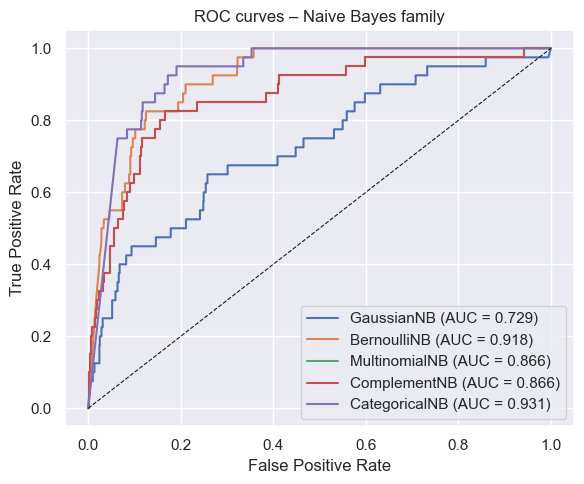

In [73]:
# ROC curve - Combined for all
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

for name, y_prob in [
    ("GaussianNB",    y_prob_g),
    ("BernoulliNB",   y_prob_bern),
    ("MultinomialNB", y_prob_multi),
    ("ComplementNB",  y_prob_comp),
    ("CategoricalNB", y_prob_cat),
]:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

# chance line
plt.plot([0, 1], [0, 1], "k--", linewidth=0.8)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves – Naive Bayes family")
plt.legend()
plt.tight_layout()
plt.show()


**`Why do the GaussianNB results differ from your earlier GaussianNB run?`**

- **Different preprocessing:** Earlier, GaussianNB was trained on StandardScaler-transformed data, but in the combined NB comparison, it was trained without scaling, leading to different probability estimates.

- **GaussianNB is highly sensitive to scaling:** Changing feature mean/variance (through scaling or not scaling) directly changes the likelihood calculations, so predictions naturally shift.

- **Different preprocessing = different metrics:** Because GaussianNB depends heavily on the assumption of normally distributed features, even small preprocessing changes lead to different accuracy/recall/AUC results.

### Model 8: Random Forest (with class weighting)

**Step 8.1 Random Forest Classifier Baseline**


In [74]:
# Random Forest baseline (metrics + classification report)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_clf.fit(X_train_resampled, y_train_resampled)

y_pred_rf  = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# scalar metrics
acc  = metrics.accuracy_score(y_test, y_pred_rf)
prec = metrics.precision_score(y_test, y_pred_rf, zero_division=0)
rec  = metrics.recall_score(y_test, y_pred_rf, zero_division=0)
f1   = metrics.f1_score(y_test, y_pred_rf, zero_division=0)

try:
    auc = metrics.roc_auc_score(y_test, y_proba_rf)
except ValueError:
    auc = float("nan")

# metrics table
print("~" * 20, "Random Forest – Metrics Table", "~" * 20)
print(f"{'Metric':<15}{'Score':>12}")
print("-" * 45)
print(f"{'Accuracy':<15}{acc:>12.4f}")
print(f"{'Precision':<15}{prec:>12.4f}")
print(f"{'Recall':<15}{rec:>12.4f}")
print(f"{'F1-score':<15}{f1:>12.4f}")
print(f"{'ROC AUC':<15}{auc:>12.4f}")
print("-" * 45)

print("\n~~~~ Random Forest – Classification Report ~~~~")
print(metrics.classification_report(
    y_test,
    y_pred_rf,
    target_names=["Non-Bankrupt (0)", "Bankrupt (1)"],
    digits=4,
    zero_division=0
))


~~~~~~~~~~~~~~~~~~~~ Random Forest – Metrics Table ~~~~~~~~~~~~~~~~~~~~
Metric                Score
---------------------------------------------
Accuracy             0.9656
Precision            0.5000
Recall               0.6750
F1-score             0.5745
ROC AUC              0.9600
---------------------------------------------

~~~~ Random Forest – Classification Report ~~~~
                  precision    recall  f1-score   support

Non-Bankrupt (0)     0.9883    0.9759    0.9821      1122
    Bankrupt (1)     0.5000    0.6750    0.5745        40

        accuracy                         0.9656      1162
       macro avg     0.7441    0.8255    0.7783      1162
    weighted avg     0.9715    0.9656    0.9680      1162



**Step 8.2: Confusion Matrix and ROC Curve**

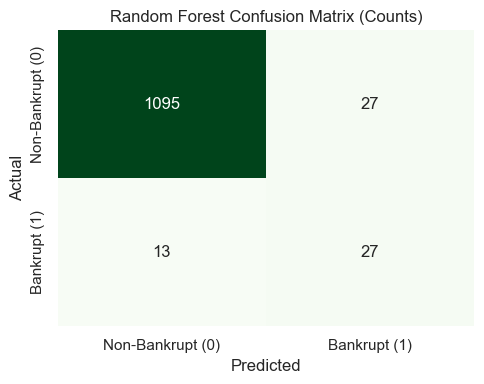

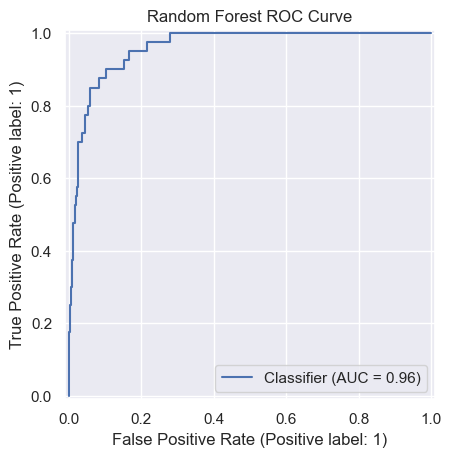

In [75]:
# Confusion matrix + ROC curve

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

cm_rf = metrics.confusion_matrix(y_test, y_pred_rf)

# Confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Greens",
    cbar=False,
    xticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"],
    yticklabels=["Non-Bankrupt (0)", "Bankrupt (1)"]
)
plt.title("Random Forest Confusion Matrix (Counts)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC curve (only if AUC is defined)
if not np.isnan(auc):
    RocCurveDisplay.from_predictions(y_test, y_proba_rf)
    plt.title("Random Forest ROC Curve")
    plt.show()


**Step 8.3: Feature Importance**

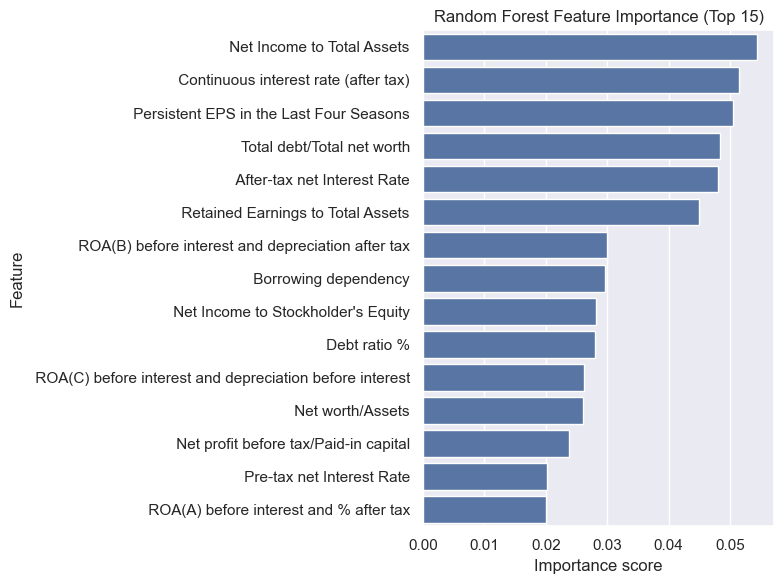

In [76]:
# Feature importance (top 15)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Try to get proper feature names from X_train; fall back to index numbers
if hasattr(X_train, "columns"):
    feature_names = X_train.columns
else:
    feature_names = np.arange(X_train.shape[1])

importances = rf_clf.feature_importances_
feat_series = pd.Series(importances, index=feature_names)

top_n = 15
top_feat = feat_series.sort_values(ascending=False).head(top_n)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=top_feat.values,
    y=top_feat.index
)
plt.title(f"Random Forest Feature Importance (Top {top_n})")
plt.xlabel("Importance score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**Step 8.4: Comparison of Naive Bayes and Random Forest**

In [77]:
def metric_summary(y_true, y_pred, y_proba, model_name):
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="binary", pos_label=1
    )
    acc = (y_true == y_pred).mean()
    auc = roc_auc_score(y_true, y_proba)
    return {
        "model": model_name,
        "accuracy": acc,
        "precision_pos": precision,
        "recall_pos": recall,
        "f1_pos": f1,
        "roc_auc": auc
    }

results = [
    metric_summary(y_test, y_pred_nb, y_proba_nb, "Naive Bayes"),
    metric_summary(y_test, y_pred_rf, y_proba_rf, "Random Forest")
]

pd.DataFrame(results)


,model,accuracy,precision_pos,recall_pos,f1_pos,roc_auc
0,Naive Bayes,0.425990,0.050215,0.875,0.094980,0.805403
1,Random Forest,0.965577,0.500000,0.675,0.574468,0.960027


**Step 8.5: ROC comparison for NB and RF**

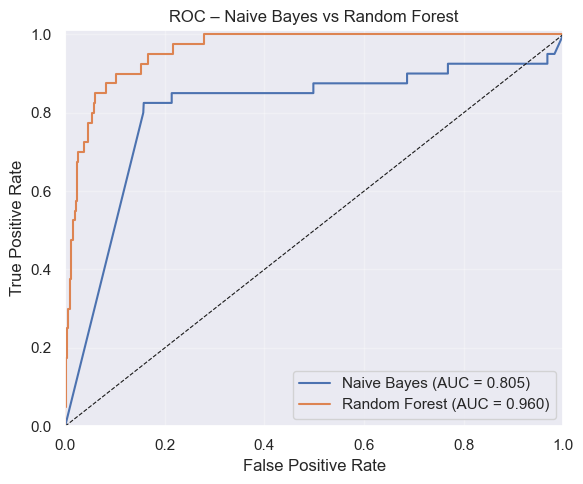

In [78]:
# ROC – Naive Bayes vs Random Forest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC points
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# AUC values
auc_nb = roc_auc_score(y_test, y_proba_nb)
auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(6, 5))

# Naive Bayes ROC
plt.plot(
    fpr_nb,
    tpr_nb,
    label=f"Naive Bayes (AUC = {auc_nb:.3f})"
)

# Random Forest ROC
plt.plot(
    fpr_rf,
    tpr_rf,
    label=f"Random Forest (AUC = {auc_rf:.3f})"
)

# Chance line
plt.plot([0, 1], [0, 1], "k--", linewidth=0.8)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC – Naive Bayes vs Random Forest")
plt.xlim(0, 1)
plt.ylim(0, 1.01)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Step 6: Comparison of All Models

**A. All Models comparison**

In [79]:
import numpy as np
import pandas as pd

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
    roc_auc_score,
    average_precision_score,
    matthews_corrcoef,
    confusion_matrix,
    balanced_accuracy_score,
    brier_score_loss,
)

# helper: compute many metrics for a binary classifier

def compute_model_metrics(y_true, y_pred, y_proba=None):
    """
    Rich metric summary for a binary classifier.
    Assumes positive class is 1 (Bankrupt).
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    acc   = accuracy_score(y_true, y_pred)
    prec  = precision_score(y_true, y_pred, zero_division=0)
    rec   = recall_score(y_true, y_pred, zero_division=0)        # sensitivity / TPR
    f1    = f1_score(y_true, y_pred, zero_division=0)
    f2    = fbeta_score(y_true, y_pred, beta=2, zero_division=0) # recall-focused

    spec  = tn / (tn + fp) if (tn + fp) > 0 else 0.0             # specificity / TNR
    bal   = balanced_accuracy_score(y_true, y_pred)
    mcc   = matthews_corrcoef(y_true, y_pred)
    fpr   = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    fnr   = fn / (fn + tp) if (fn + tp) > 0 else 0.0

    # score-based metrics
    roc_auc = np.nan
    pr_auc  = np.nan
    brier   = np.nan
    if y_proba is not None:
        roc_auc = roc_auc_score(y_true, y_proba)
        pr_auc  = average_precision_score(y_true, y_proba)
        brier   = brier_score_loss(y_true, y_proba)

    return dict(
        TN=tn, FP=fp, FN=fn, TP=tp,
        Accuracy=acc,
        Precision=prec,
        Recall_Sensitivity=rec,
        Specificity=spec,
        F1=f1,
        F2=f2,
        Balanced_Accuracy=bal,
        FPR=fpr,
        FNR=fnr,
        MCC=mcc,
        ROC_AUC=roc_auc,
        PR_AUC=pr_auc,
        Brier_Score=brier,
    )

# register all models that exist in this notebook

all_models_raw = {}

def register_model(name, y_pred_var, y_proba_var=None):
    """
    Look up variables by name in globals() and, if present, add to dict.
    This lets the cell be robust even if some models weren't run.
    """
    g = globals()
    if y_pred_var in g:
        y_pred = g[y_pred_var]
        y_proba = g.get(y_proba_var) if y_proba_var is not None else None
        all_models_raw[name] = (y_pred, y_proba)

# Naive Bayes family
register_model("GaussianNB_nb",    "y_pred_nb",        "y_proba_nb")
register_model("GaussianNB_g",     "y_pred_g",         "y_prob_g")
register_model("BernoulliNB",      "y_pred_bern",      "y_prob_bern")
register_model("ComplementNB",     "y_pred_comp",      "y_prob_comp")
register_model("MultinomialNB",    "y_pred_multi",     "y_prob_multi")

# KNN
register_model("KNN",              "y_pred",       "y_prob_best")

# Random Forest
register_model("RandomForest",     "y_pred_rf",        "y_proba_rf")

# ANN (sklearn pipeline)
register_model("ANN_pipeline",     "y_pred_ann",       "y_prob_ann")

# Baseline & tuned MLP
register_model("MLP_baseline",     "y_pred_mlp",       "y_proba_mlp")
register_model("MLP_tuned",        "y_pred_mlp_tuned", "y_proba_mlp_tuned")

# CatBoost & XGBoost & SVM
register_model("CatBoost",         "y_pred_cat",       "y_proba_cat")
register_model("XGBoost",          "y_pred_xgb",       "y_proba_xgb")
register_model("SVM_RBF",          "y_pred_svm",       "y_proba_svm")

print("Models detected for comparison:", list(all_models_raw.keys()))

# build comparison table

rows = []
for model_name, (y_pred, y_proba) in all_models_raw.items():
    m = compute_model_metrics(y_test, y_pred, y_proba)
    m["Model"] = model_name
    rows.append(m)

all_models_df = (
    pd.DataFrame(rows)
      .set_index("Model")
      .sort_values(by=["ROC_AUC", "Recall_Sensitivity"], ascending=False)
)

display(all_models_df.round(4))

# optional: save for report
all_models_df.to_csv("bankruptcy_model_comparison_all_models.csv", index=True)


Models detected for comparison: ['GaussianNB_nb', 'GaussianNB_g', 'BernoulliNB', 'ComplementNB', 'MultinomialNB', 'KNN', 'RandomForest', 'ANN_pipeline', 'MLP_baseline', 'MLP_tuned', 'CatBoost', 'XGBoost', 'SVM_RBF']


,TN,FP,FN,TP,Accuracy,Precision,Recall_Sensitivity,Specificity,F1,F2,Balanced_Accuracy,FPR,FNR,MCC,ROC_AUC,PR_AUC,Brier_Score
Model,,,,,,,,,,,,,,,,,
RandomForest,1095,27,13,27,0.9656,0.5000,0.675,0.9759,0.5745,0.6308,0.8255,0.0241,0.325,0.5638,0.9600,0.5192,0.0318
CatBoost,921,201,3,37,0.8244,0.1555,0.925,0.8209,0.2662,0.4648,0.8729,0.1791,0.075,0.3369,0.9428,0.5994,0.0235
XGBoost,1106,16,18,22,0.9707,0.5789,0.550,0.9857,0.5641,0.5556,0.7679,0.0143,0.450,0.5492,0.9422,0.5765,0.0238
SVM_RBF,1039,83,12,28,0.9182,0.2523,0.700,0.9260,0.3709,0.5166,0.8130,0.0740,0.300,0.3883,0.9226,0.4295,0.0495
BernoulliNB,882,240,4,36,0.7900,0.1304,0.900,0.7861,0.2278,0.4128,0.8430,0.2139,0.100,0.2939,0.9179,0.2857,0.2072
ANN_pipeline,1106,16,20,20,0.9690,0.5556,0.500,0.9857,0.5263,0.5102,0.7429,0.0143,0.500,0.5111,0.9083,0.5150,0.0296
KNN,921,201,3,37,0.8244,0.1555,0.925,0.8209,0.2662,0.4648,0.8729,0.1791,0.075,0.3369,0.9059,0.3034,0.1058
MLP_tuned,1099,23,19,21,0.9639,0.4773,0.525,0.9795,0.5000,0.5147,0.7523,0.0205,0.475,0.4819,0.9022,0.4649,0.0352
MLP_baseline,1101,21,20,20,0.9647,0.4878,0.500,0.9813,0.4938,0.4975,0.7406,0.0187,0.500,0.4756,0.8924,0.4944,0.0330


**B. Best Models Only**

In [80]:
# Choose how many best models to highlight
TOP_N = 4

# Pick top N by ROC_AUC (ties broken by Recall_Sensitivity)
top_names = (
    all_models_df
    .sort_values(by=["ROC_AUC", "Recall_Sensitivity"], ascending=False)
    .head(TOP_N)
    .index.tolist()
)

print(f"Top {TOP_N} models:", top_names)

best_models_df = all_models_df.loc[top_names].copy()
display(best_models_df.round(4))

# keep a mapping from name -> (y_pred, y_proba) for plotting later
best_models_outputs = {name: all_models_raw[name] for name in top_names}


Top 4 models: ['RandomForest', 'CatBoost', 'XGBoost', 'SVM_RBF']


,TN,FP,FN,TP,Accuracy,Precision,Recall_Sensitivity,Specificity,F1,F2,Balanced_Accuracy,FPR,FNR,MCC,ROC_AUC,PR_AUC,Brier_Score
Model,,,,,,,,,,,,,,,,,
RandomForest,1095,27,13,27,0.9656,0.5000,0.675,0.9759,0.5745,0.6308,0.8255,0.0241,0.325,0.5638,0.9600,0.5192,0.0318
CatBoost,921,201,3,37,0.8244,0.1555,0.925,0.8209,0.2662,0.4648,0.8729,0.1791,0.075,0.3369,0.9428,0.5994,0.0235
XGBoost,1106,16,18,22,0.9707,0.5789,0.550,0.9857,0.5641,0.5556,0.7679,0.0143,0.450,0.5492,0.9422,0.5765,0.0238
SVM_RBF,1039,83,12,28,0.9182,0.2523,0.700,0.9260,0.3709,0.5166,0.8130,0.0740,0.300,0.3883,0.9226,0.4295,0.0495


**C. ROC + PR curves**

Models included in ROC / PR plots: ['RandomForest', 'CatBoost', 'XGBoost', 'SVM_RBF']


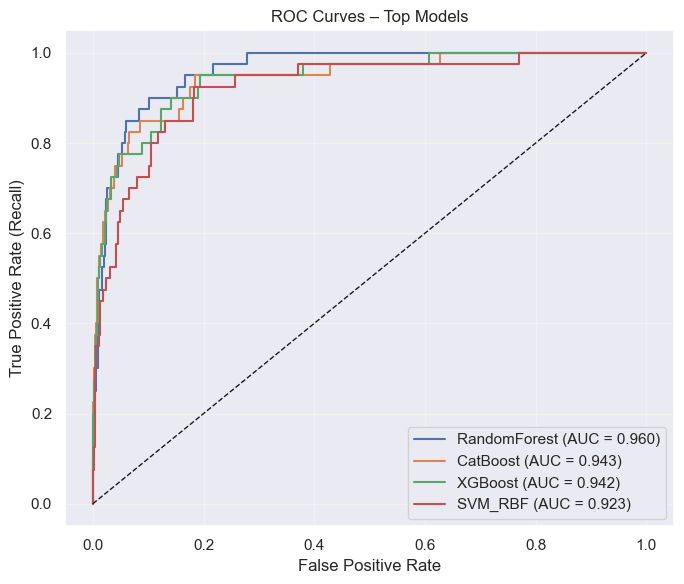

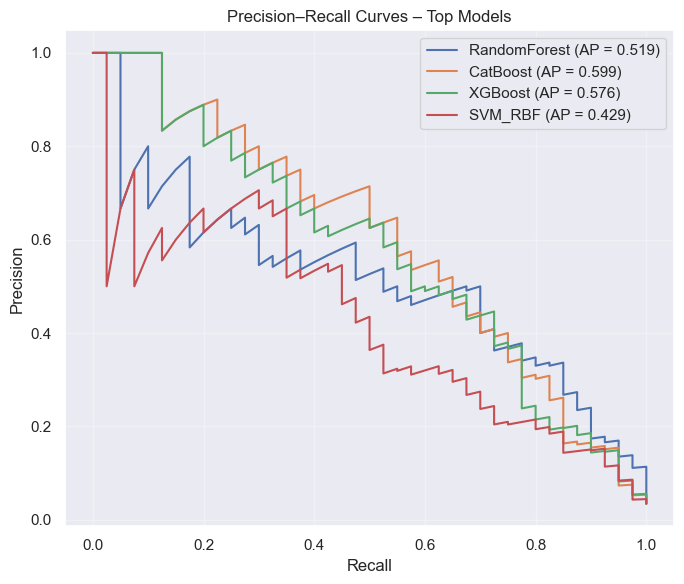

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

print("Models included in ROC / PR plots:", list(best_models_outputs.keys()))

# ROC Curves

plt.figure(figsize=(7, 6))

for model_name, (y_pred, y_proba) in best_models_outputs.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_val = all_models_df.loc[model_name, "ROC_AUC"]
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_val:.3f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curves – Top Models")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Precision–Recall Curves

plt.figure(figsize=(7, 6))

for model_name, (y_pred, y_proba) in best_models_outputs.items():
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap = all_models_df.loc[model_name, "PR_AUC"]
    plt.plot(recall, precision, label=f"{model_name} (AP = {ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves – Top Models")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**D. Heatmap of metrics for all models**

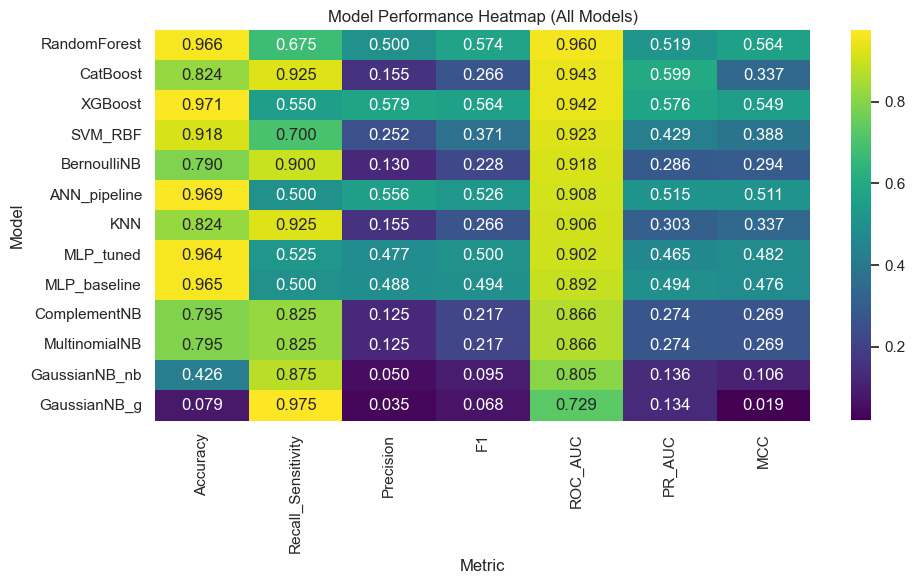

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# pick a subset of metrics that are easy to show in a heatmap
metric_subset = ["Accuracy", "Recall_Sensitivity", "Precision", "F1", "ROC_AUC", "PR_AUC", "MCC"]

heatmap_df = all_models_df[metric_subset].copy()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df.round(3), annot=True, fmt=".3f", cmap="viridis")
plt.title("Model Performance Heatmap (All Models)")
plt.ylabel("Model")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()


**E. Ranking bar chart by ROC-AUC**

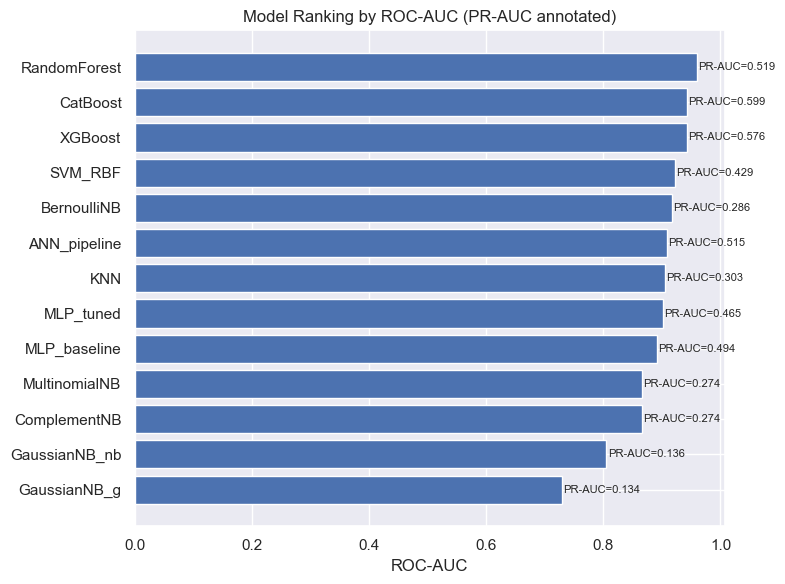

In [83]:
rank_df = all_models_df.sort_values("ROC_AUC", ascending=True)  # ascending so best at top in horizontal bar

plt.figure(figsize=(8, 6))
plt.barh(rank_df.index, rank_df["ROC_AUC"])
for i, (idx, row) in enumerate(rank_df.iterrows()):
    plt.text(row["ROC_AUC"] + 0.002, i, f"PR-AUC={row['PR_AUC']:.3f}", va="center", fontsize=8)

plt.xlabel("ROC-AUC")
plt.title("Model Ranking by ROC-AUC (PR-AUC annotated)")
plt.tight_layout()
plt.show()


**F. Radar / spider plot for the top 3-4 models**

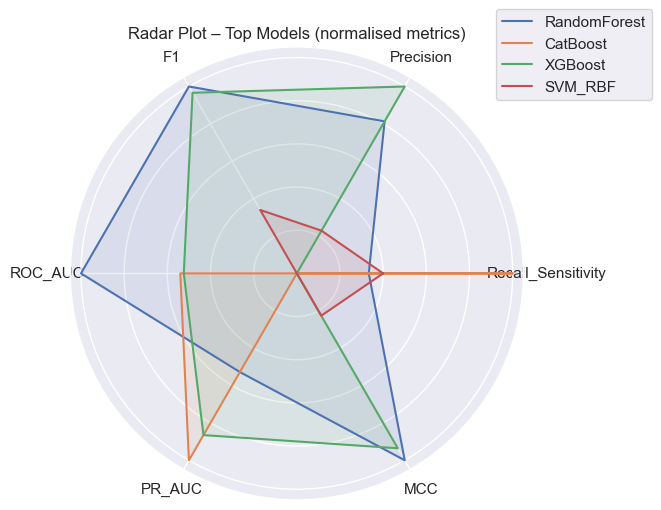

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# choose a few important metrics
radar_metrics = ["Recall_Sensitivity", "Precision", "F1", "ROC_AUC", "PR_AUC", "MCC"]

# use the same top_names you computed before
radar_df = all_models_df.loc[top_names, radar_metrics]

# normalise to [0,1] per column so scale is comparable
radar_norm = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min() + 1e-9)

labels = radar_metrics
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

for model_name in radar_norm.index:
    values = radar_norm.loc[model_name].tolist()
    values += values[:1]
    ax.plot(angles, values, label=model_name)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("Radar Plot – Top Models (normalised metrics)")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


**G. Top-4 Metric Comparison**

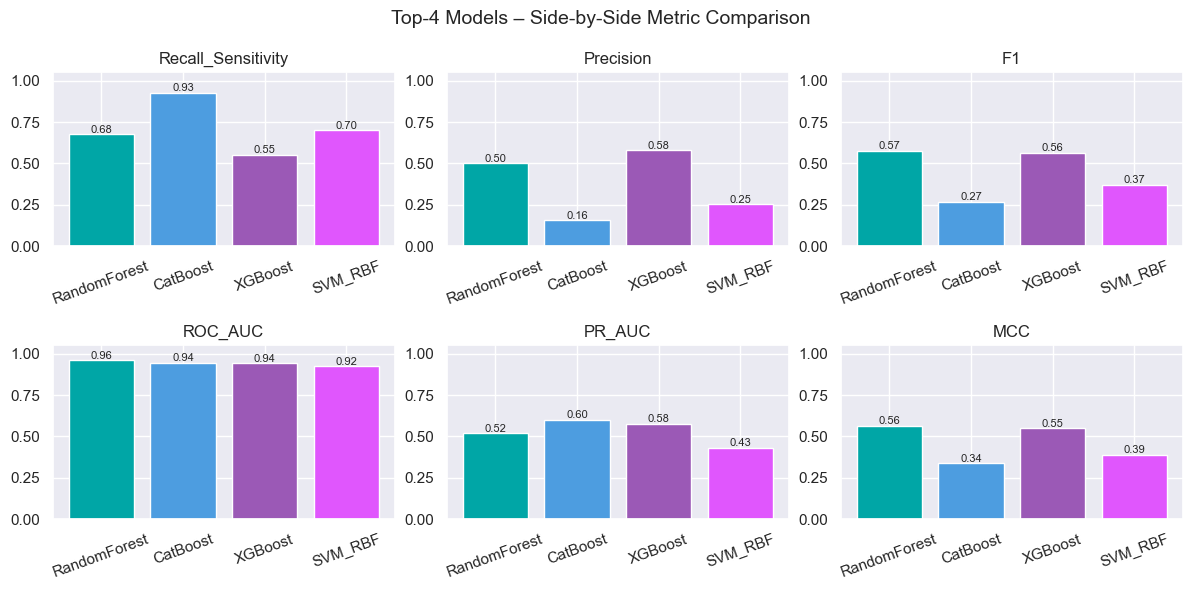

In [85]:
# Plot 1 WITH CUSTOM COLORS (Pastel Professional)

colors = ["#00A6A6", "#4D9DE0", "#9B59B6", "#E056FD"]


metrics = ["Recall_Sensitivity", "Precision", "F1", "ROC_AUC", "PR_AUC", "MCC"]
top4_df = best_models_df[metrics].copy()

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    ax = axes[i]

    ax.bar(top4_df.index, top4_df[metric], color=colors)
    ax.set_title(metric)
    ax.set_ylim(0, 1.05)
    ax.tick_params(axis="x", rotation=20)

    for j, val in enumerate(top4_df[metric]):
        ax.text(j, val + 0.01, f"{val:.2f}", ha="center", fontsize=8)

fig.suptitle("Top-4 Models – Side-by-Side Metric Comparison", fontsize=14)
plt.tight_layout()
plt.show()


**H. FP vs FN error composition**

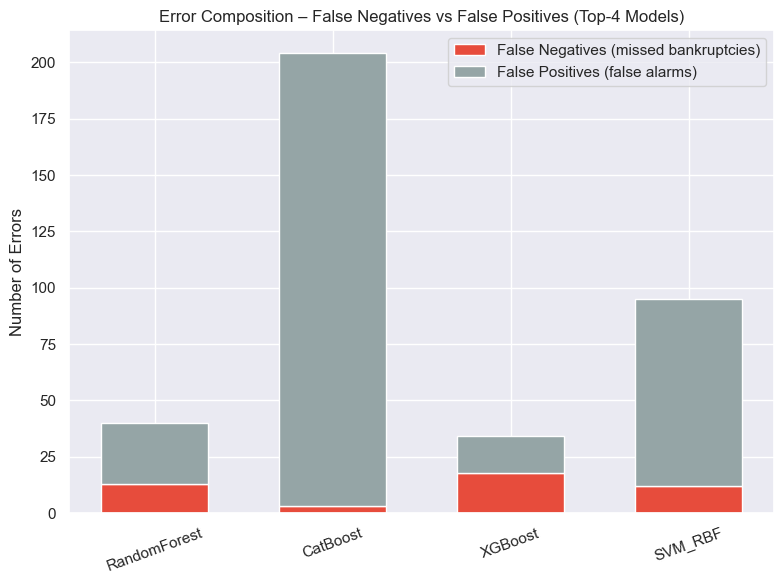

In [86]:
# Plot 2

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# choose your colors:
FN_color = "#E74C3C"    # red for missed bankruptcies (severe)
FP_color = "#95A5A6"    # gray for false alarms (neutral)

models = list(best_models_outputs.keys())
fp_list, fn_list = [], []

for m in models:
    y_pred, _ = best_models_outputs[m]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fp_list.append(fp)
    fn_list.append(fn)

x = np.arange(len(models))
width = 0.6

plt.figure(figsize=(8, 6))
plt.bar(x, fn_list, width, label="False Negatives (missed bankruptcies)", color=FN_color)
plt.bar(x, fp_list, width, bottom=fn_list, label="False Positives (false alarms)", color=FP_color)

plt.xticks(x, models, rotation=20)
plt.ylabel("Number of Errors")
plt.title("Error Composition – False Negatives vs False Positives (Top-4 Models)")
plt.legend()
plt.tight_layout()
plt.show()


**I. Model Confidence Distribution - Probabilities per Class**


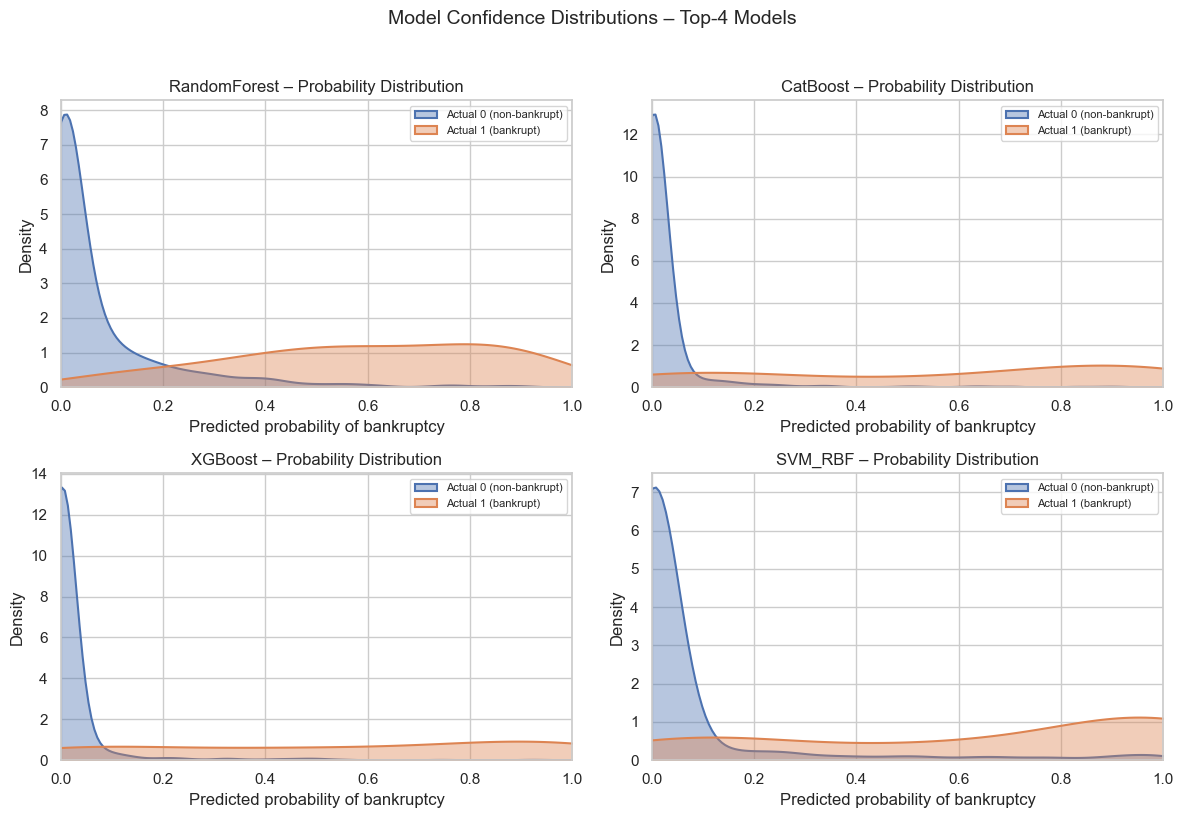

In [87]:
# Confidence Distribution – How sharply each model separates classes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

models = list(best_models_outputs.keys())   # top-4 models
n_models = len(models)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for ax, model_name in zip(axes, models):
    y_pred, y_proba = best_models_outputs[model_name]
    y_proba = np.asarray(y_proba)

    # probabilities for actual class 1 vs 0
    probs_pos = y_proba[y_test == 1]
    probs_neg = y_proba[y_test == 0]

    # KDE / histogram overlay
    sns.kdeplot(probs_neg, ax=ax, fill=True, alpha=0.4, linewidth=1.5, label="Actual 0 (non-bankrupt)")
    sns.kdeplot(probs_pos, ax=ax, fill=True, alpha=0.4, linewidth=1.5, label="Actual 1 (bankrupt)")

    ax.set_xlim(0, 1)
    ax.set_title(f"{model_name} – Probability Distribution")
    ax.set_xlabel("Predicted probability of bankruptcy")
    ax.set_ylabel("Density")

    ax.legend(fontsize=8)

plt.suptitle("Model Confidence Distributions – Top-4 Models", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
